<a href="https://colab.research.google.com/github/joony0512/Stastistics_and_MachineLearning/blob/main/%EA%B1%B4%EC%84%A4%EA%B8%B0%EA%B3%84%EC%98%A4%EC%9D%BC%EC%83%81%ED%83%9C%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8%EC%A0%81%ED%95%A9_Adasyn_%EC%8B%A4%EC%A0%9C%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%81%ED%95%A9ing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adasyn + hyperparameter조절 + Grid Search

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## train

In [5]:
# CSV 파일을 불러와 데이터프레임으로 저장합니다.
df = pd.read_csv('/content/drive/MyDrive/2023년 4학년 2학기/머신러닝PBL/train.csv')
# 데이터프레임의 첫 5개 행을 출력합니다.
df.head()


,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [6]:
# 데이터프레임의 정보를 출력합니다.
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
uniqueSample = []


for item in list(df):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(df[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(df[df[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(df[df[item].isnull() == True])/len(df[item])*100,2))
    
for item in dataFeatures:
    minValue.append(df[item].min())

for item in dataFeatures:
    maxValue.append(df[item].max())

for item in dataFeatures:
    unique.append(df[item].nunique())

for item in dataFeatures:
    uniqueSample.append(df[item].unique()[0:2])

train_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample':uniqueSample
})
train_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,ID,object,0,0.00,14095,TRAIN_00000,TRAIN_14094,"[TRAIN_00000, TRAIN_00001]"
1,COMPONENT_ARBITRARY,object,0,0.00,4,COMPONENT1,COMPONENT4,"[COMPONENT3, COMPONENT2]"
2,ANONYMOUS_1,int64,0,0.00,2951,1000,294451,"[1486, 1350]"
3,YEAR,int64,0,0.00,16,2007,2022,"[2011, 2021]"
4,SAMPLE_TRANSFER_DAY,int64,0,0.00,107,0,368,"[7, 51]"
5,ANONYMOUS_2,int64,0,0.00,842,200,9650,"[200, 375]"
6,AG,int64,0,0.00,4,0,3,"[0, 1]"
7,AL,int64,0,0.00,328,0,4630,"[3, 2]"
8,B,int64,0,0.00,504,0,2051,"[93, 19]"
9,BA,int64,0,0.00,38,0,216,"[0, 1]"


In [7]:
# COMPONENT_ARBITRARY 변수의 분포를 확인합니다.
df['COMPONENT_ARBITRARY'].value_counts()


COMPONENT3    7050
COMPONENT1    3890
COMPONENT2    2316
COMPONENT4     839
Name: COMPONENT_ARBITRARY, dtype: int64

## test

In [8]:
test_df = pd.read_csv('/content/drive/MyDrive/2023년 4학년 2학기/머신러닝PBL/test.csv')

In [9]:
test_df.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469


In [10]:
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
uniqueSample = []


for item in list(test_df):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(test_df[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(test_df[test_df[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(test_df[test_df[item].isnull() == True])/len(test_df[item])*100,2))
    
for item in dataFeatures:
    minValue.append(test_df[item].min())

for item in dataFeatures:
    maxValue.append(test_df[item].max())

for item in dataFeatures:
    unique.append(test_df[item].nunique())

for item in dataFeatures:
    uniqueSample.append(test_df[item].unique()[0:2])

test_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample':uniqueSample
})

test_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,ID,object,0,0.0,6041,TEST_0000,TEST_6040,"[TEST_0000, TEST_0001]"
1,COMPONENT_ARBITRARY,object,0,0.0,4,COMPONENT1,COMPONENT4,"[COMPONENT1, COMPONENT3]"
2,ANONYMOUS_1,int64,0,0.0,2264,1000,239570,"[2192, 2794]"
3,YEAR,int64,0,0.0,16,2007,2022,"[2016, 2011]"
4,ANONYMOUS_2,int64,0,0.0,629,200,9650,"[200, 473]"
5,AG,int64,0,0.0,3,0,2,"[0, 1]"
6,CO,int64,0,0.0,6,0,13,"[0, 1]"
7,CR,int64,0,0.0,80,0,1415,"[0, 2]"
8,CU,int64,0,0.0,374,0,4113,"[1, 16]"
9,FE,int64,0,0.0,891,0,30407,"[12, 278]"


## Original Feature 분석

In [11]:
print(df.shape)
# print(test_df.shape)

(14095, 54)


### train data column

> Train 데이터의 각 Feature는 다음과 같은 의미를 가지고 있습니다.
*   `ID` : ID
*   `COMPONENT_ARBITRARY` : sample 오일 관련 부품 (Component 4종)
*   `ANONYMOUS_1` : 무명 Feature 1, 수치형 데이터
*   `YEAR` : 오일 진단 년도(Year)
*   `SAMPLE_TRANSFER_DAY` : 오일 샘플링 후 진단 기관으로 이동한 기간(Days)
*   `ANONYMOUS_2` : 무명 Feature 2, 수치형 데이터
*   `AG` : 은(Silver) 함유량
*   `AL` : 알루미늄(Aluminium) 함유량
*   `B` : 붕소(Boron) 함유량
*   `BA` : 바륨(Barium) 함유량
*   `BE` : 베릴륨(Beryllium) 함유량
*   `CA` : 칼슘(Calcium) 함유량
*   `CD` : 카드뮴(Cadmium) 함유량
*   `CO` : 코발트(Cobolt) 함유량
*   `CR` : 크로뮴(Chromium) 함유량
*   `CR` : 구리(Copper) 함유량
*   `FH2O` : 물(Water) 수치(By FT-IR)
*   `FNOX` : 질소산화물(Nox) 수치(By FT-IR)
*   `FOPTIMETHGLY` : 비식별화
*   `FOXID` : 산화(Oxidation) 수치(By FT-IR)
*   `FSO4` : 황산염(S04) 수치(By FT-IR)
*   `FTBN` : 염기성 첨가제물질 수치(By FT-IR)
*   `FE` : 철(Iron) 함유량
*   `FUEL` : 연료 함유량
*   `H2O` : 물 함유량
*   `K` : 칼륨(Potassium) 함유량
*   `LI` : 리튬(Lithium) 함유량
*   `MG` : 마그네슘(Magnesium) 함유량
*   `MN` : 망가니즈(Manganese) 함유량
*   `MO` : 몰리브덴(Molybdenum) 함유량
*   `NA` : 나트륨(Sodium) 함유량
*   `NI` : 니켈(Nickel) 함유량
*   `P` : 인(Phosphorus) 함유량
*   `PB` : 납(Lead) 함유량
*   `PQINDEX` : 입자 정량화 지수(Particle Quantifier Index)
*   `S` : 황(Sulphur) 함유량
*   `SB` : 안티몬(Antimony) 함유량
*   `SI` : 규소(Silicone) 함유량
*   `SN` : 주석(Tin) 함유량
*   `SOOTPERCENTAGE` : 그을음 정도
*   `TI` : 티타늄(Titanium) 함유량
*   `U100` : 100㎛ 이상 입자 크기(Particle Count)
*   `U75` : 75㎛ 이상 입자 크기(Particle Count)
*   `U50` : 50㎛ 이상 입자 크기(Particle Count)
*   `U25` : 25㎛ 이상 입자 크기(Particle Count)
*   `U20` : 20㎛ 이상 입자 크기(Particle Count)
*   `U14` : 14㎛ 이상 입자 크기(Particle Count)
*   `U6` : 6㎛ 이상 입자 크기(Particle Count)
*   `U4` : 4㎛ 이상 입자 크기(Particle Count)
*   `V` : 바나듐(Vanadium) 함유량
*   `V100` : 점도(Viscosity) @ 100 degrees
*   `V40` : 점도(Viscosity) @ 40 degrees
*   `ZN` : 아연(Zinc) 함유량
*   `Y_LABEL` : 오일 정상 여부(0 : 정상, 1 : 이상)




In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

#데이터 전처리

In [13]:
# Y_LABEL을 int형에서 object형으로 변환
df = df.astype({'Y_LABEL' : 'object'})

In [14]:
#인덱스 변경
df.set_index('ID', inplace=True)

In [15]:
#COMPONENT_ARBITRARY컬럼 onehot encoding
one_hot_encoded = pd.get_dummies(df['COMPONENT_ARBITRARY'])
print(one_hot_encoded)

             COMPONENT1  COMPONENT2  COMPONENT3  COMPONENT4
ID                                                         
TRAIN_00000           0           0           1           0
TRAIN_00001           0           1           0           0
TRAIN_00002           0           1           0           0
TRAIN_00003           0           0           1           0
TRAIN_00004           0           0           1           0
...                 ...         ...         ...         ...
TRAIN_14090           0           0           1           0
TRAIN_14091           1           0           0           0
TRAIN_14092           0           0           1           0
TRAIN_14093           0           1           0           0
TRAIN_14094           0           1           0           0

[14095 rows x 4 columns]


In [16]:
#원래 열 제거
df = df.drop('COMPONENT_ARBITRARY', axis =1) #나중에 사용

In [17]:
#새로운 열들 추가
df.insert(0, 'COMPONENT1', one_hot_encoded['COMPONENT1'])
df.insert(1, 'COMPONENT2', one_hot_encoded['COMPONENT2'])
df.insert(2, 'COMPONENT3', one_hot_encoded['COMPONENT3'])
df.insert(3, 'COMPONENT4', one_hot_encoded['COMPONENT4'])
print(df)#나중에사용

             COMPONENT1  COMPONENT2  COMPONENT3  COMPONENT4  ANONYMOUS_1  \
ID                                                                         
TRAIN_00000           0           0           1           0         1486   
TRAIN_00001           0           1           0           0         1350   
TRAIN_00002           0           1           0           0         2415   
TRAIN_00003           0           0           1           0         7389   
TRAIN_00004           0           0           1           0         3954   
...                 ...         ...         ...         ...          ...   
TRAIN_14090           0           0           1           0         1616   
TRAIN_14091           1           0           0           0         2784   
TRAIN_14092           0           0           1           0         1788   
TRAIN_14093           0           1           0           0         2498   
TRAIN_14094           0           1           0           0         1902   

           

## 결측치 확인 및 null 값 처리

In [18]:
df.isnull().sum()/df.shape[0]*100

COMPONENT1              0.000000
COMPONENT2              0.000000
COMPONENT3              0.000000
COMPONENT4              0.000000
ANONYMOUS_1             0.000000
YEAR                    0.000000
SAMPLE_TRANSFER_DAY     0.000000
ANONYMOUS_2             0.000000
AG                      0.000000
AL                      0.000000
B                       0.000000
BA                      0.000000
BE                      0.000000
CA                      0.000000
CD                      9.890032
CO                      0.000000
CR                      0.000000
CU                      0.000000
FH2O                   72.401561
FNOX                   72.401561
FOPTIMETHGLY           72.401561
FOXID                  72.401561
FSO4                   72.401561
FTBN                   72.401561
FE                      0.000000
FUEL                   72.401561
H2O                     0.000000
K                      16.310748
LI                      0.000000
MG                      0.000000
MN        

In [19]:
percent30UP = list(train_info[train_info['nullPCT'] >= 30.0]['dataFeatures'])
df = df.drop(percent30UP,axis=1)


In [20]:
# 결측치 비율이 20 이하인 컬럼들에 대해서만 결측치 처리
for column in df.columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [21]:
df.isnull().sum()/df.shape[0]*100

COMPONENT1             0.0
COMPONENT2             0.0
COMPONENT3             0.0
COMPONENT4             0.0
ANONYMOUS_1            0.0
YEAR                   0.0
SAMPLE_TRANSFER_DAY    0.0
ANONYMOUS_2            0.0
AG                     0.0
AL                     0.0
B                      0.0
BA                     0.0
BE                     0.0
CA                     0.0
CD                     0.0
CO                     0.0
CR                     0.0
CU                     0.0
FE                     0.0
H2O                    0.0
K                      0.0
LI                     0.0
MG                     0.0
MN                     0.0
MO                     0.0
NA                     0.0
NI                     0.0
P                      0.0
PB                     0.0
PQINDEX                0.0
S                      0.0
SB                     0.0
SI                     0.0
SN                     0.0
TI                     0.0
V                      0.0
V40                    0.0
Z

In [22]:
df.columns

Index(['COMPONENT1', 'COMPONENT2', 'COMPONENT3', 'COMPONENT4', 'ANONYMOUS_1',
       'YEAR', 'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA',
       'BE', 'CA', 'CD', 'CO', 'CR', 'CU', 'FE', 'H2O', 'K', 'LI', 'MG', 'MN',
       'MO', 'NA', 'NI', 'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'TI',
       'V', 'V40', 'ZN', 'Y_LABEL'],
      dtype='object')

In [23]:
print(df.shape)

(14095, 39)


In [24]:
# 제거된 feature list
percent30UP

['FH2O',
 'FNOX',
 'FOPTIMETHGLY',
 'FOXID',
 'FSO4',
 'FTBN',
 'FUEL',
 'SOOTPERCENTAGE',
 'U100',
 'U75',
 'U50',
 'U25',
 'U20',
 'U14',
 'U6',
 'U4',
 'V100']

## columns 정의


In [25]:
categorical_features = ['COMPONENT_ARBITRARY1','COMPONENT_ARBITRARY2','COMPONENT_ARBITRARY3','COMPONENT_ARBITRARY4', 'YEAR', 'Y_LABEL']
numerical_features = [i for i in df.columns if i not in categorical_features]
test_features = [i for i in test_df.columns]

## outlier확인

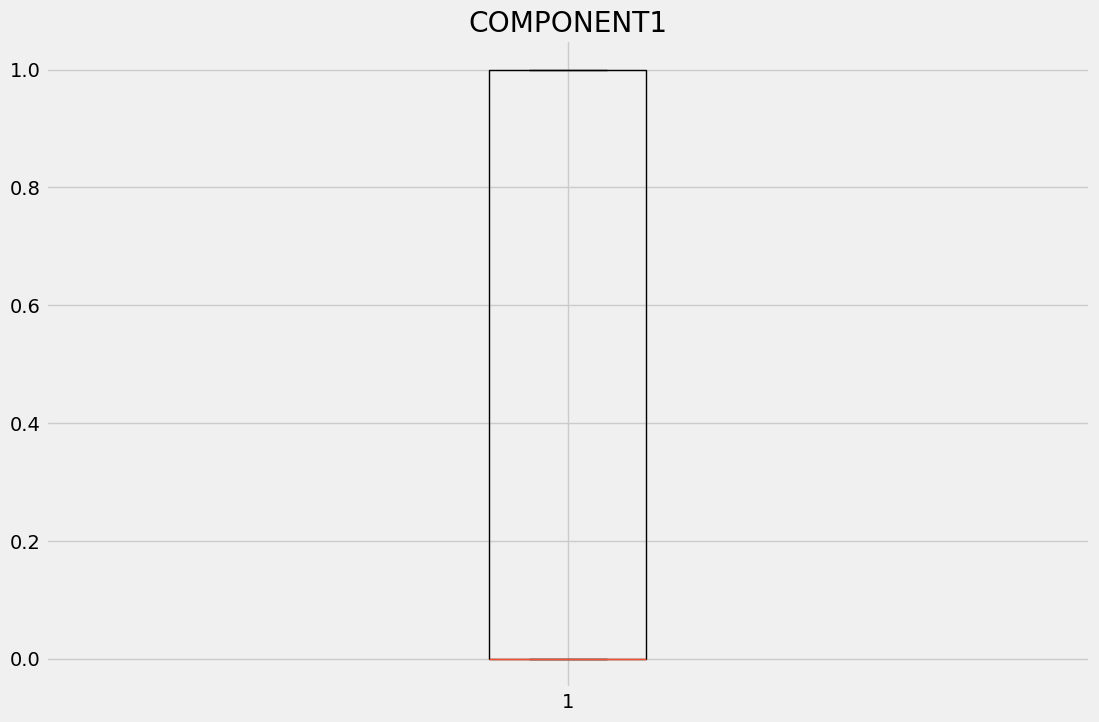

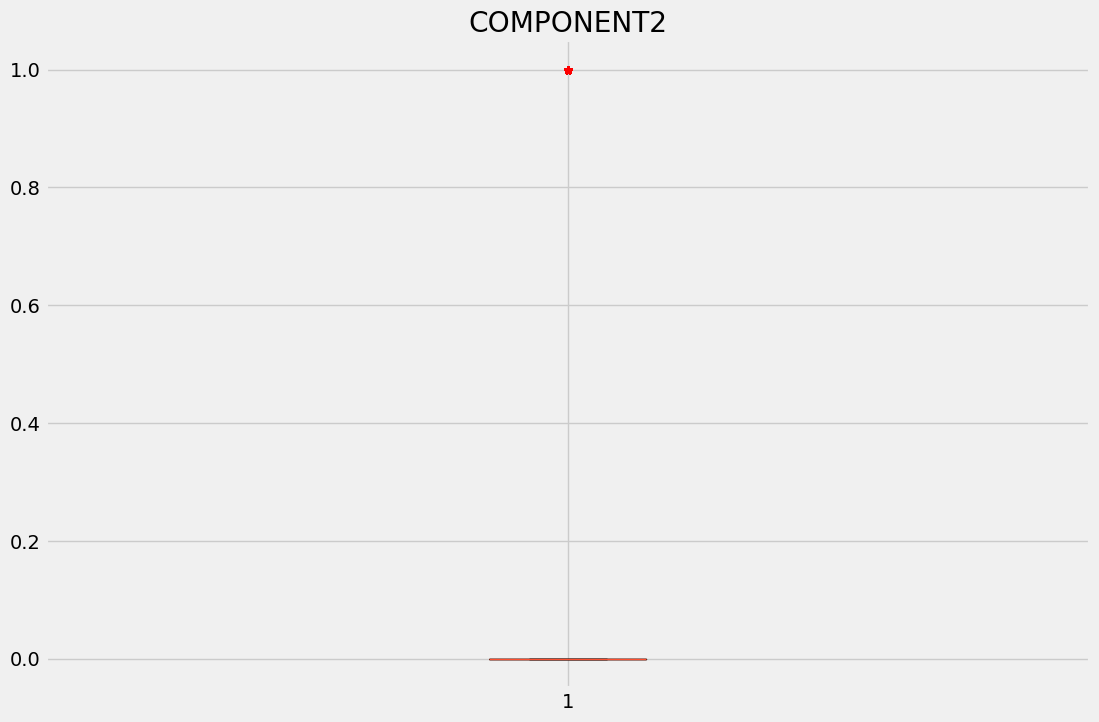

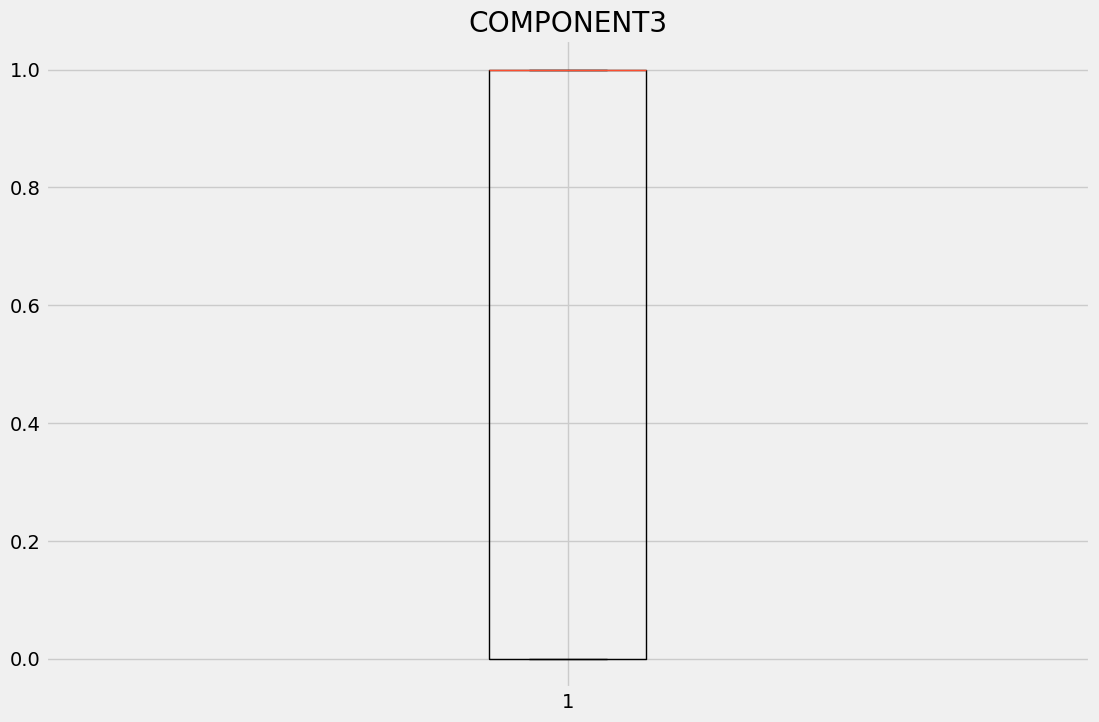

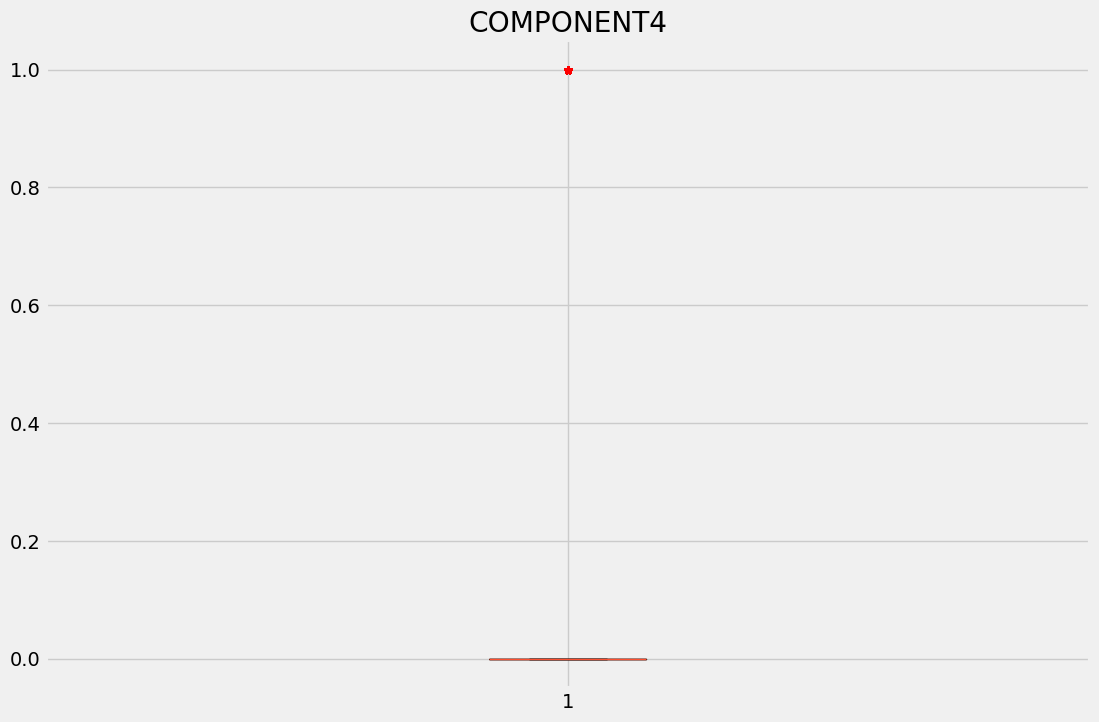

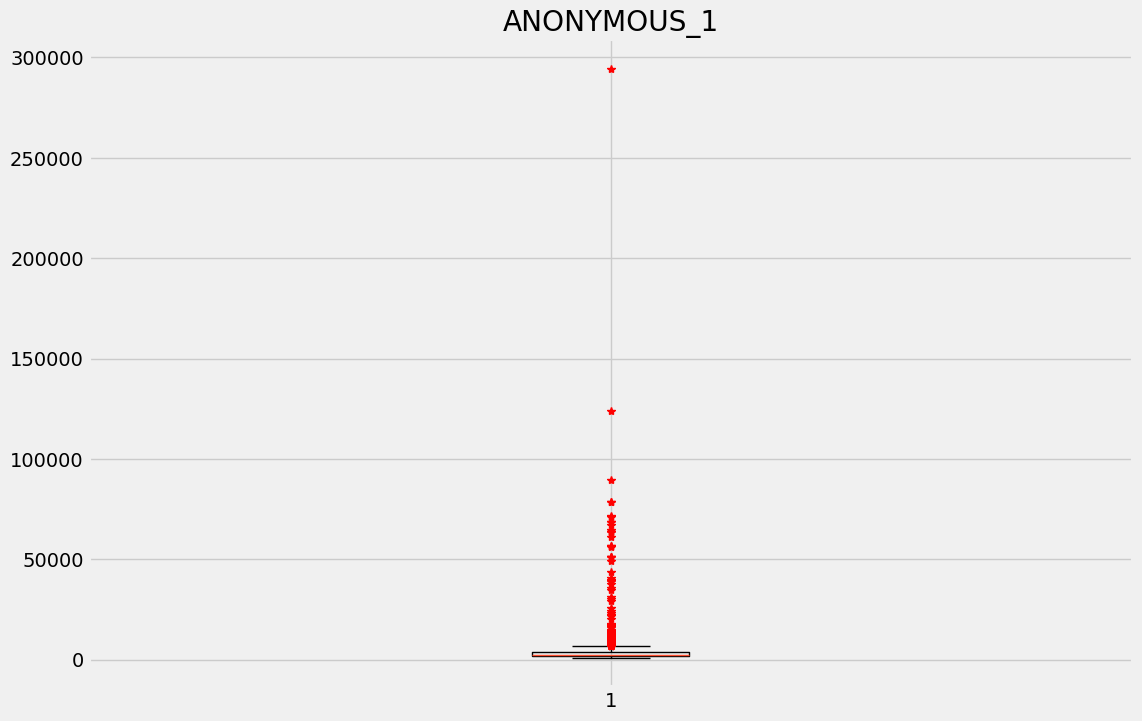

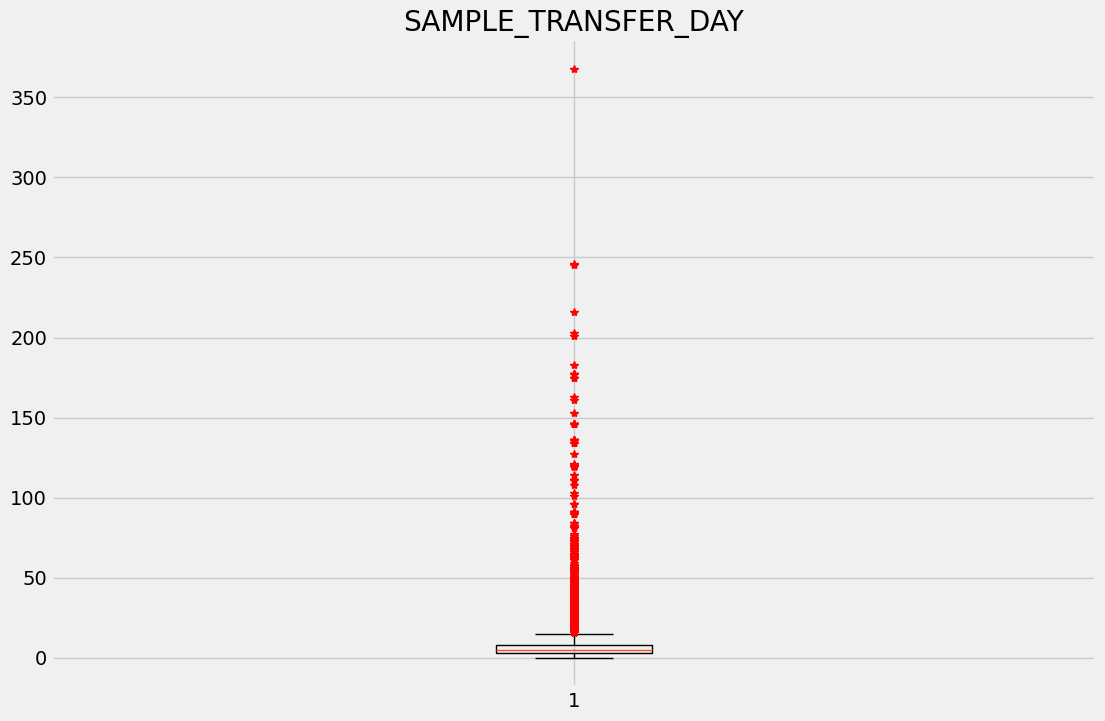

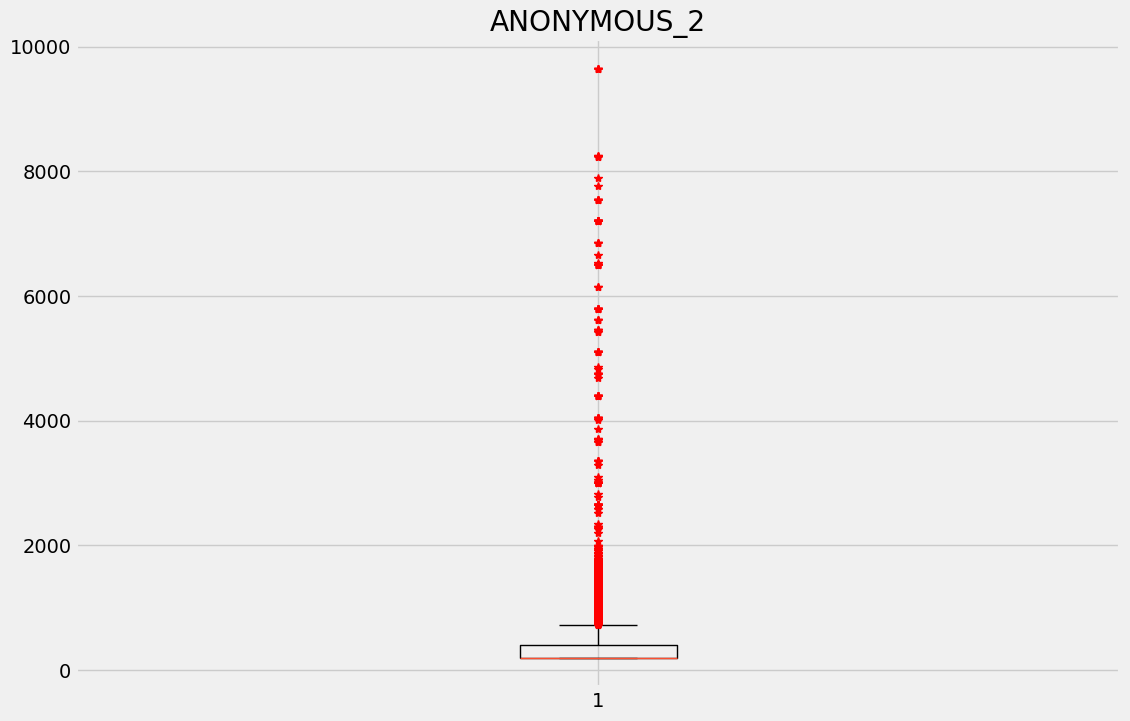

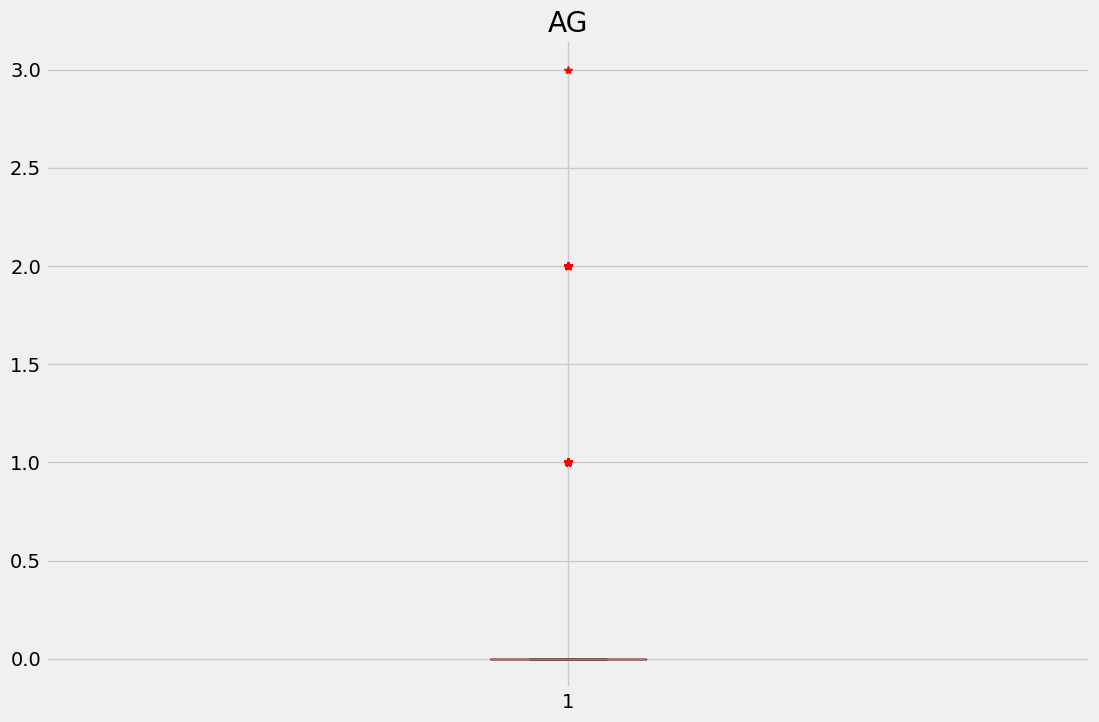

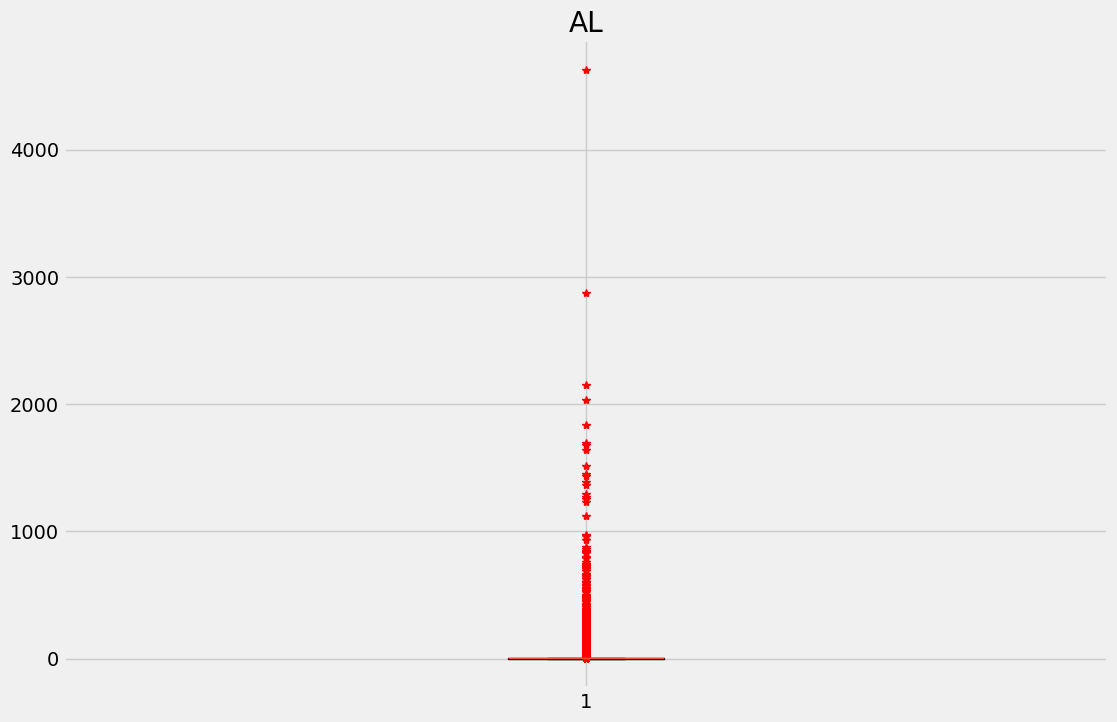

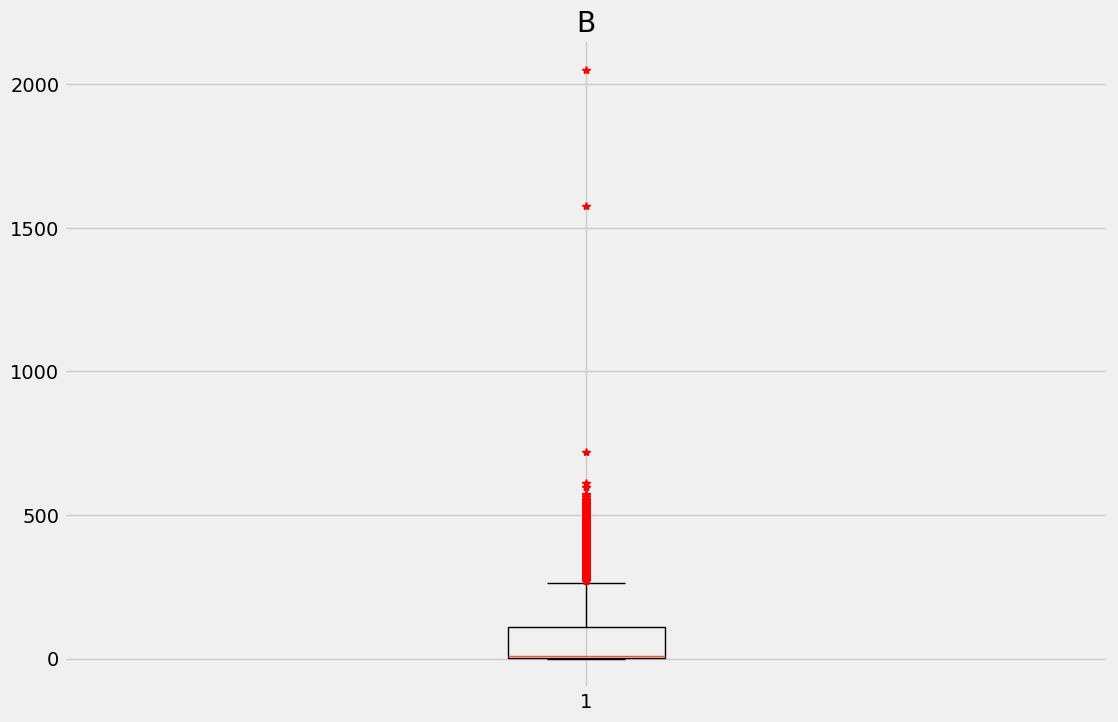

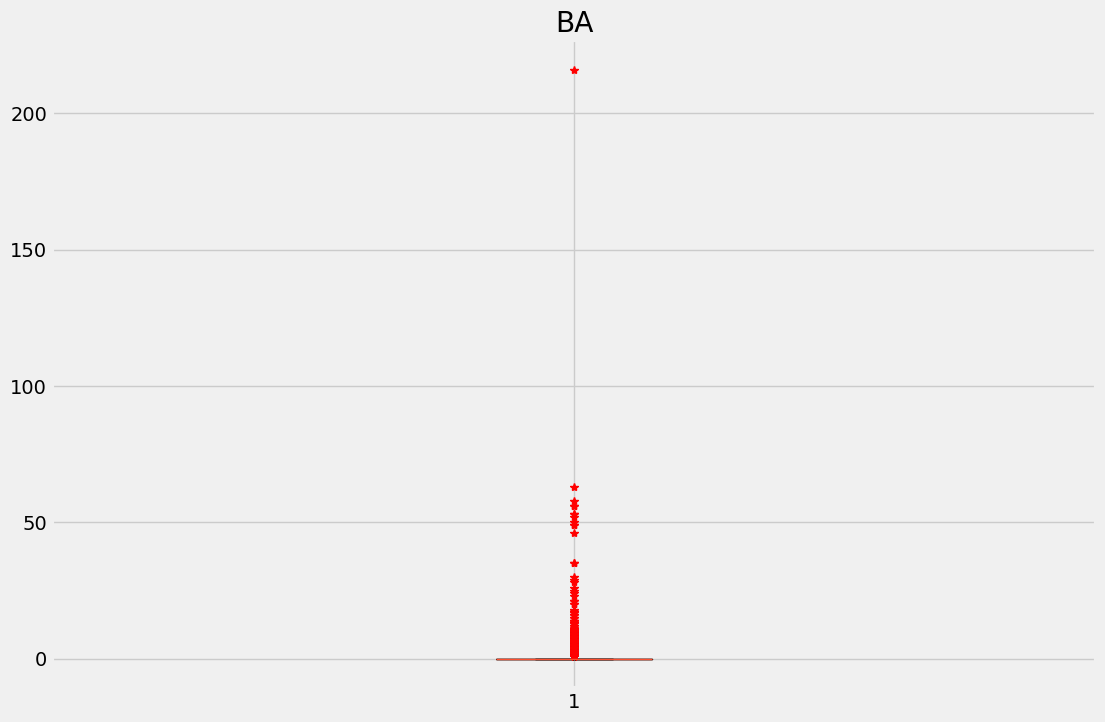

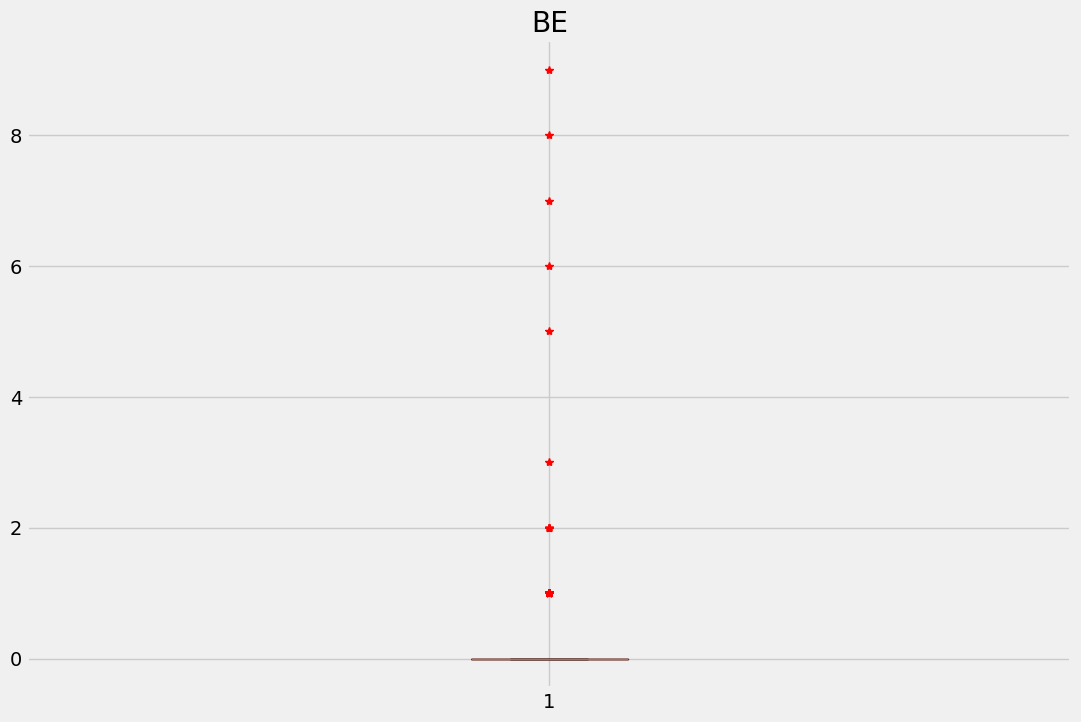

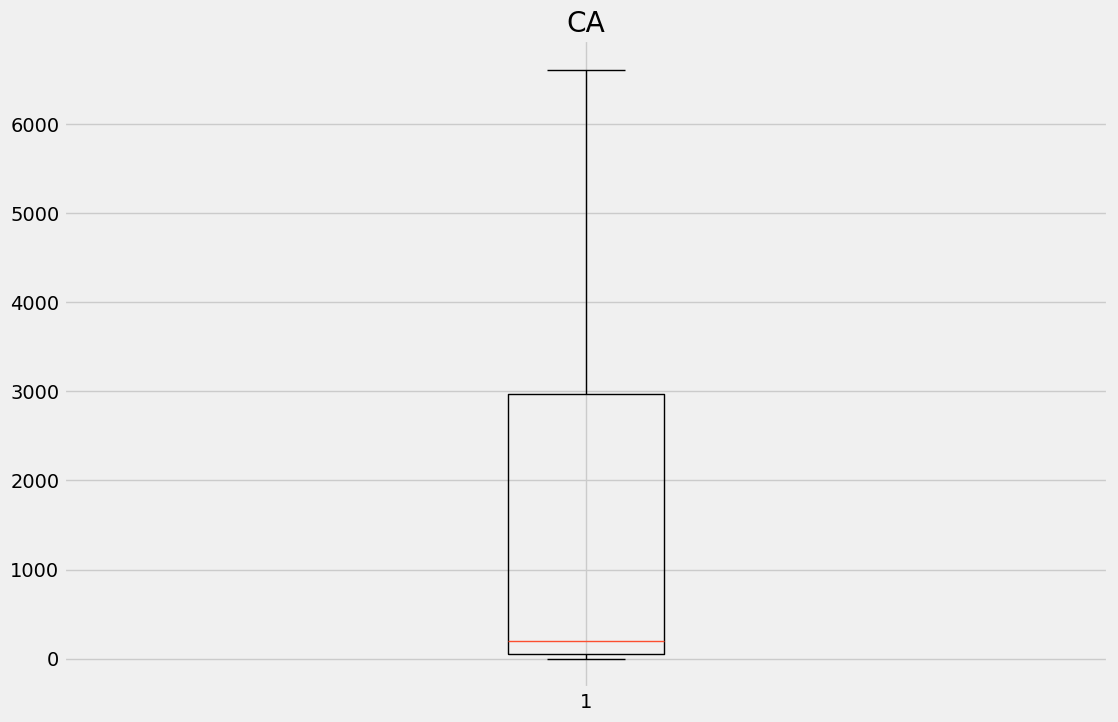

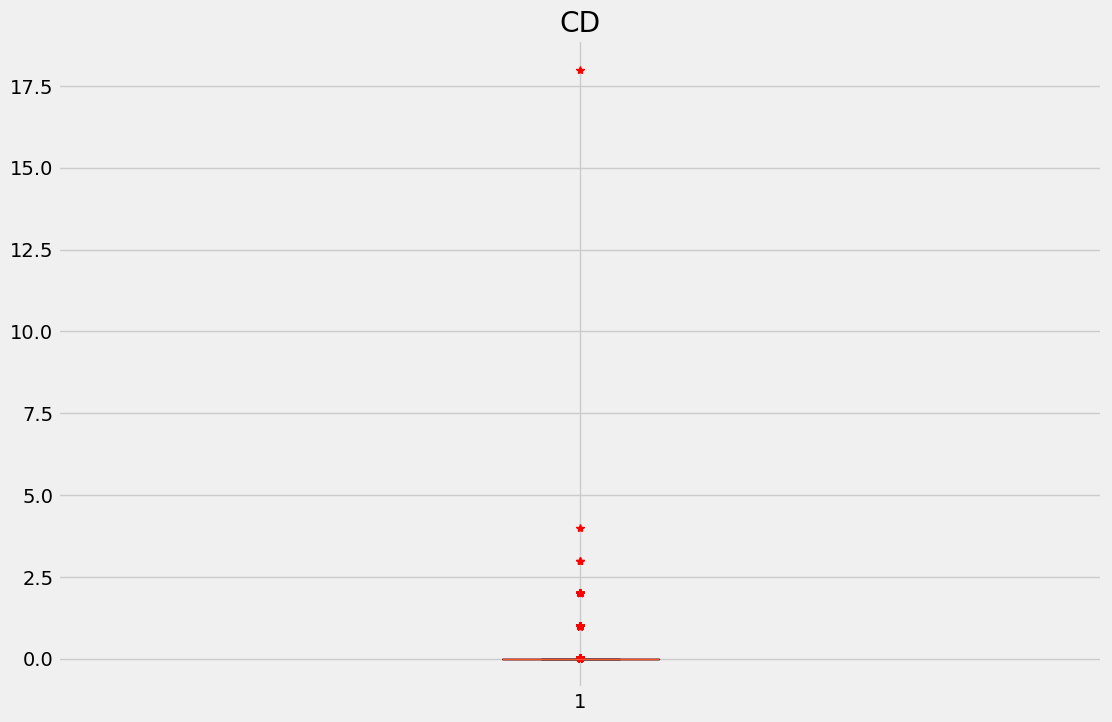

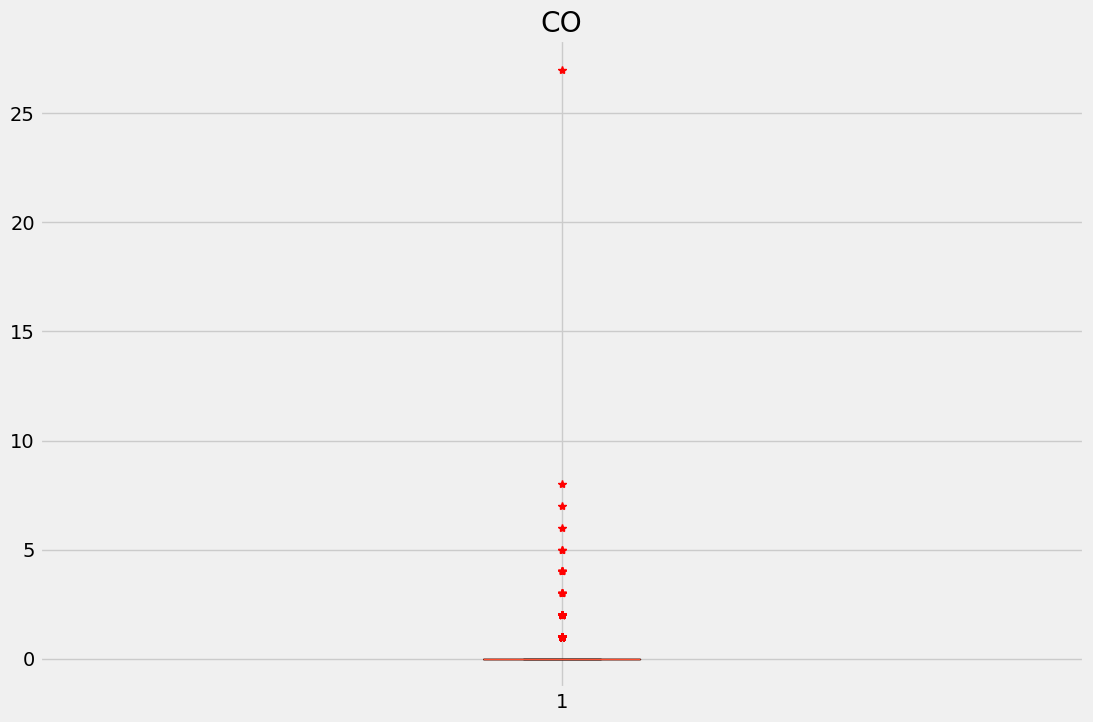

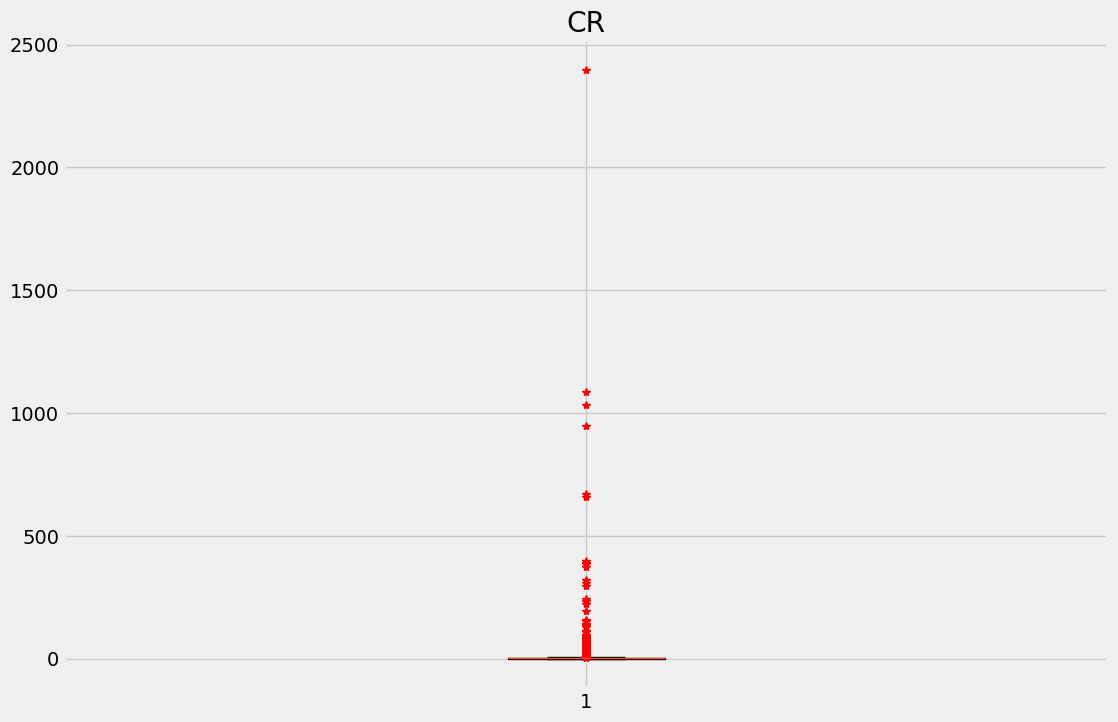

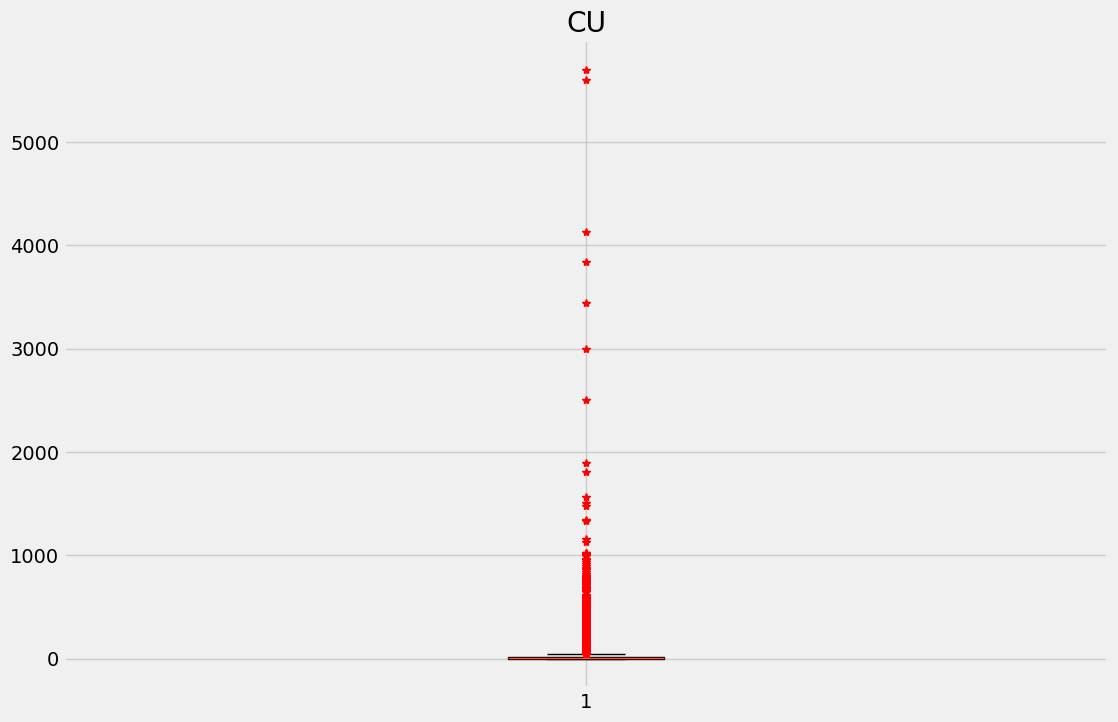

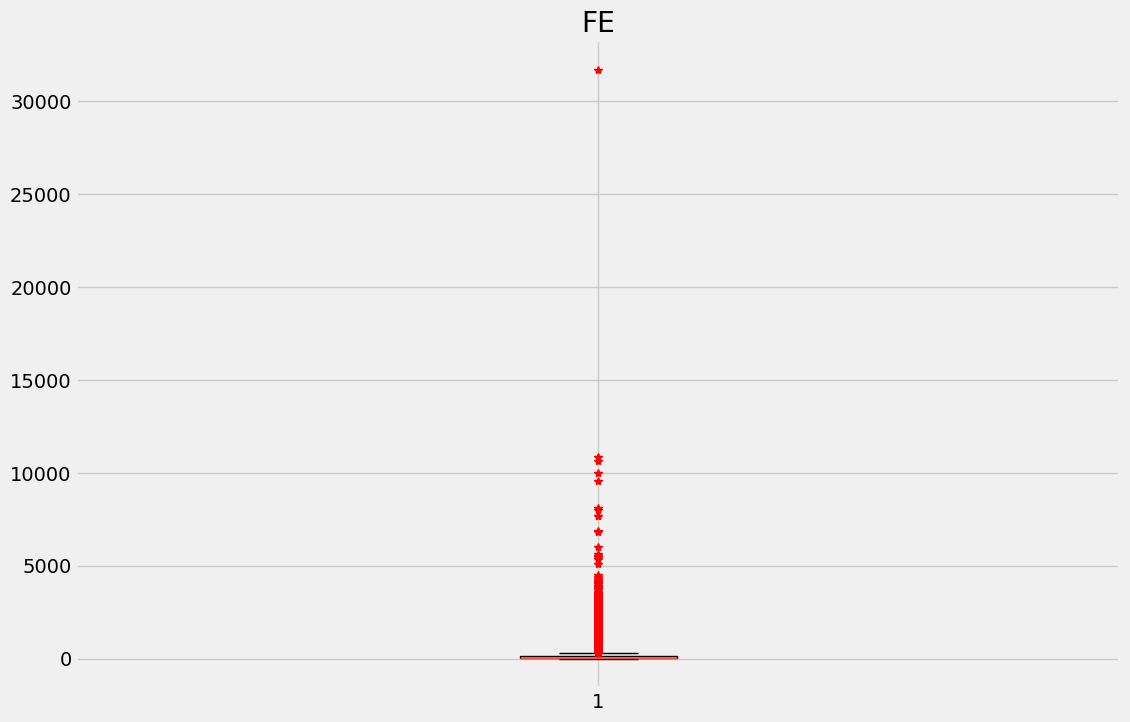

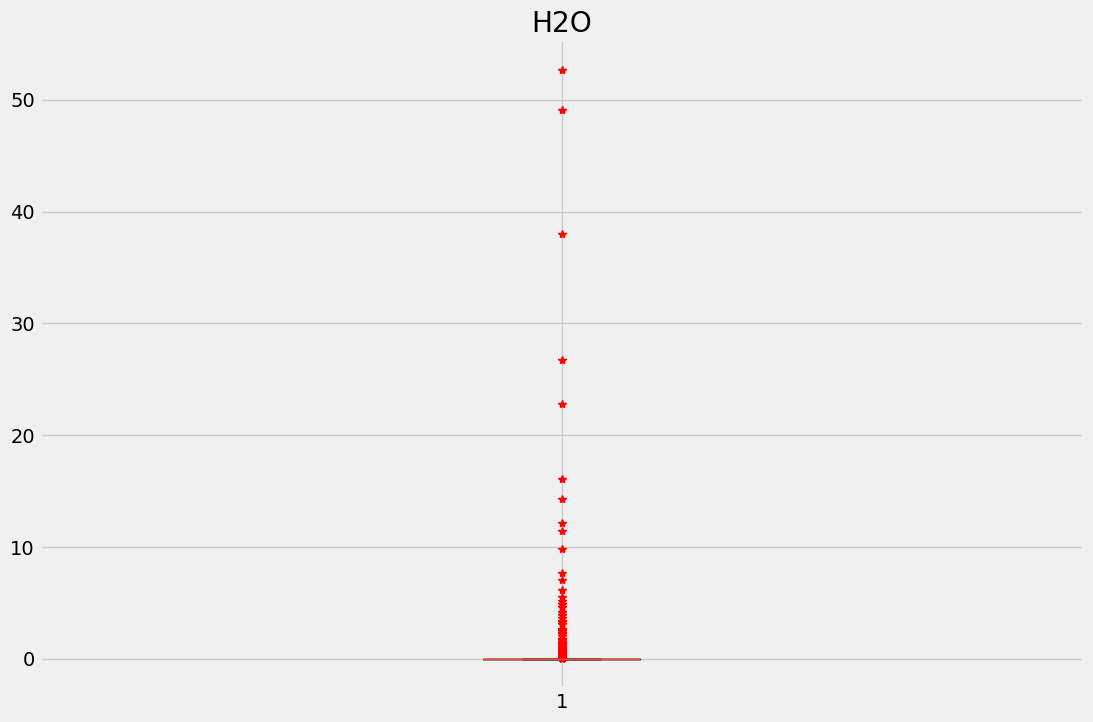

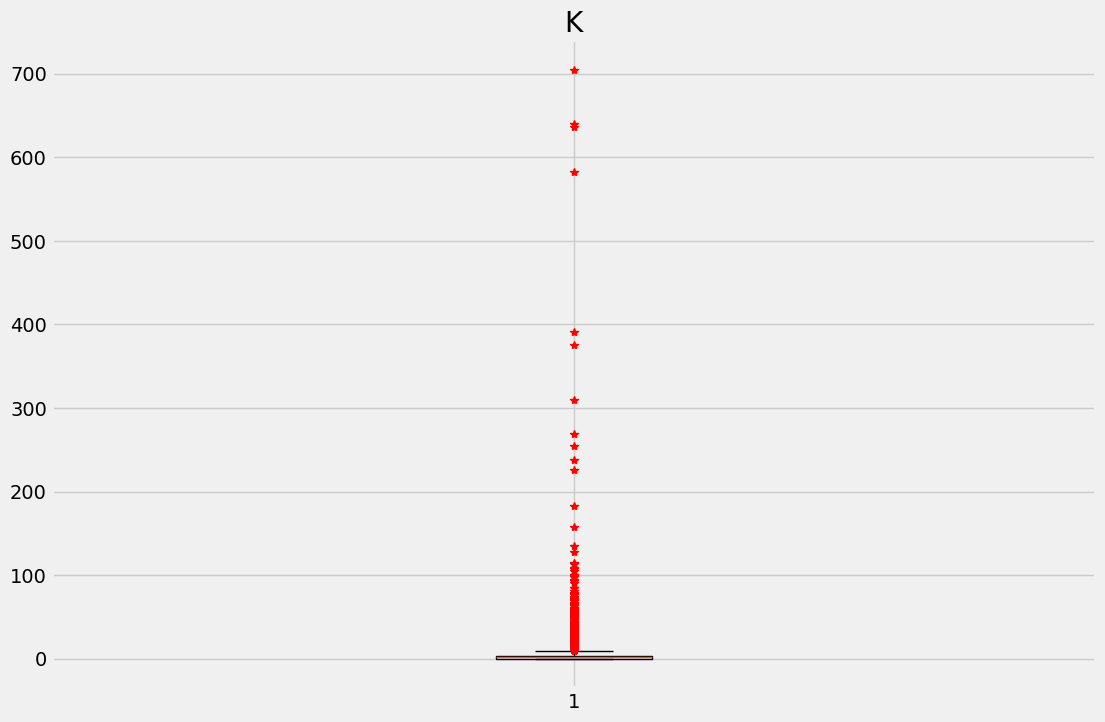

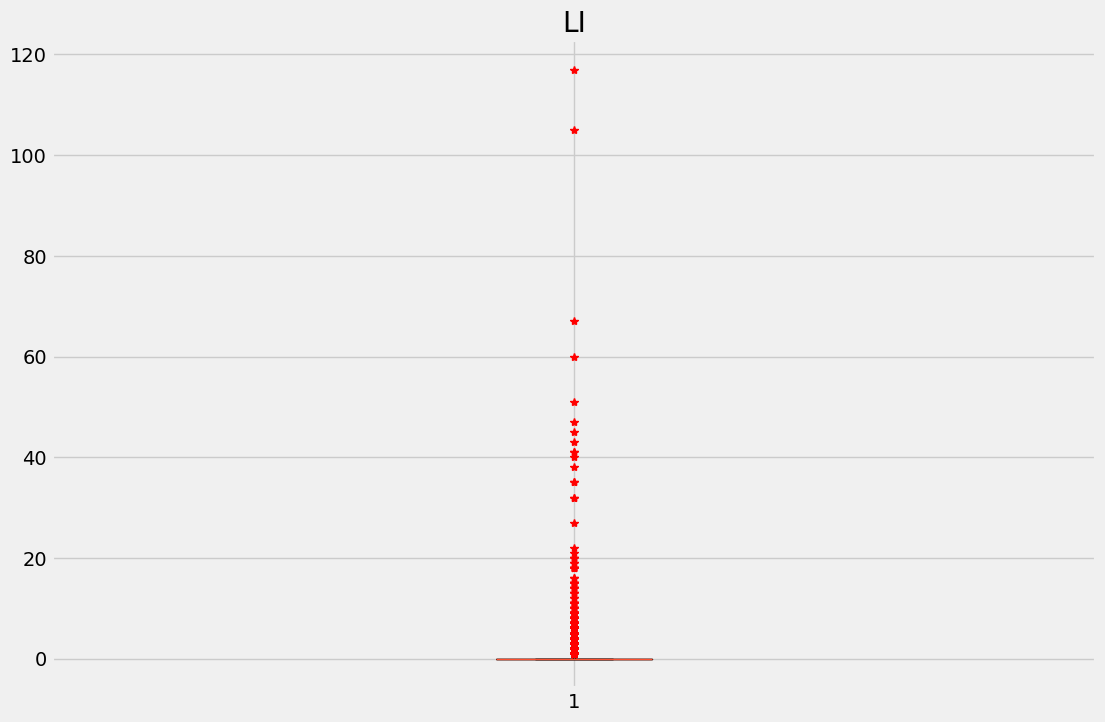

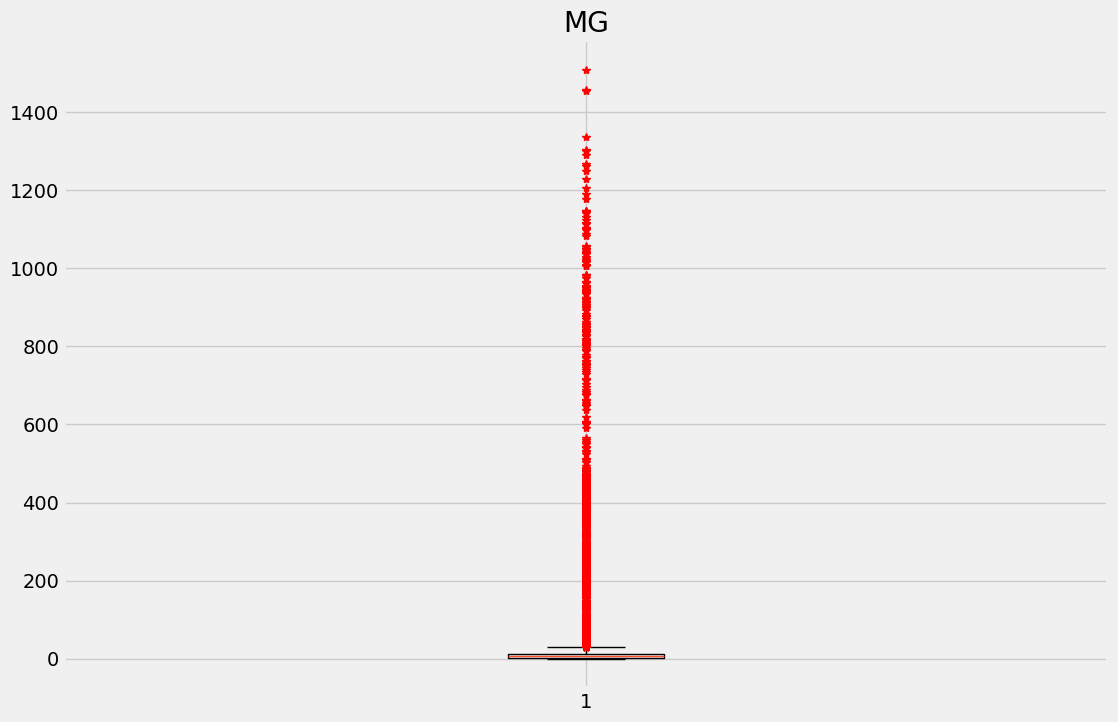

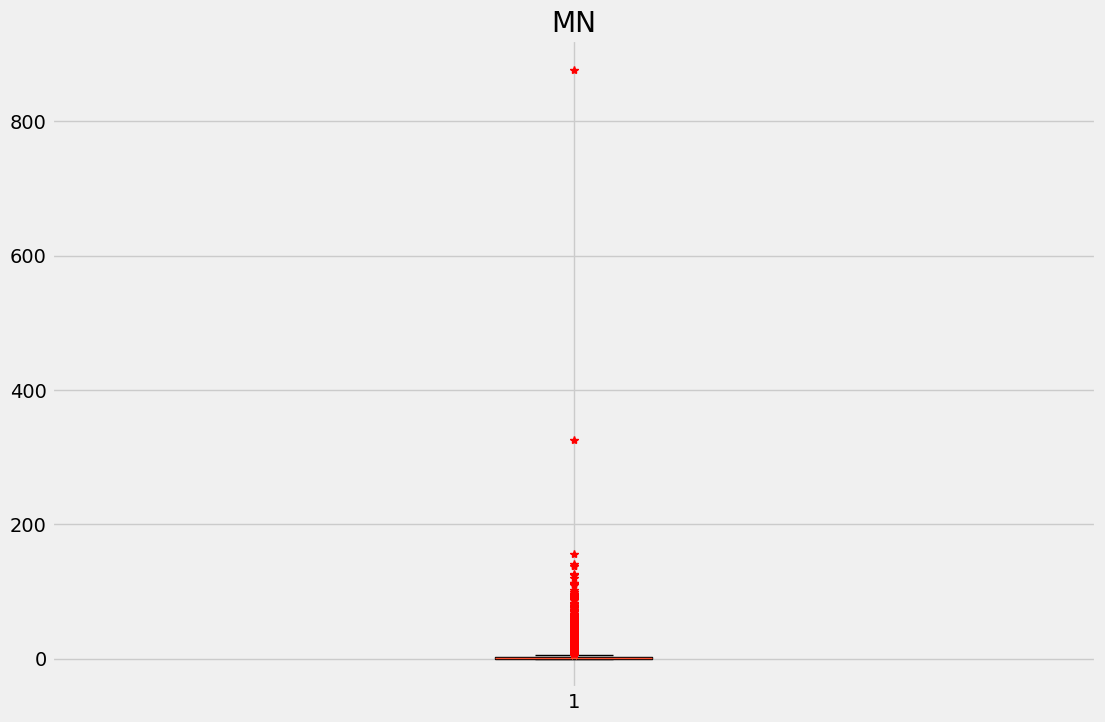

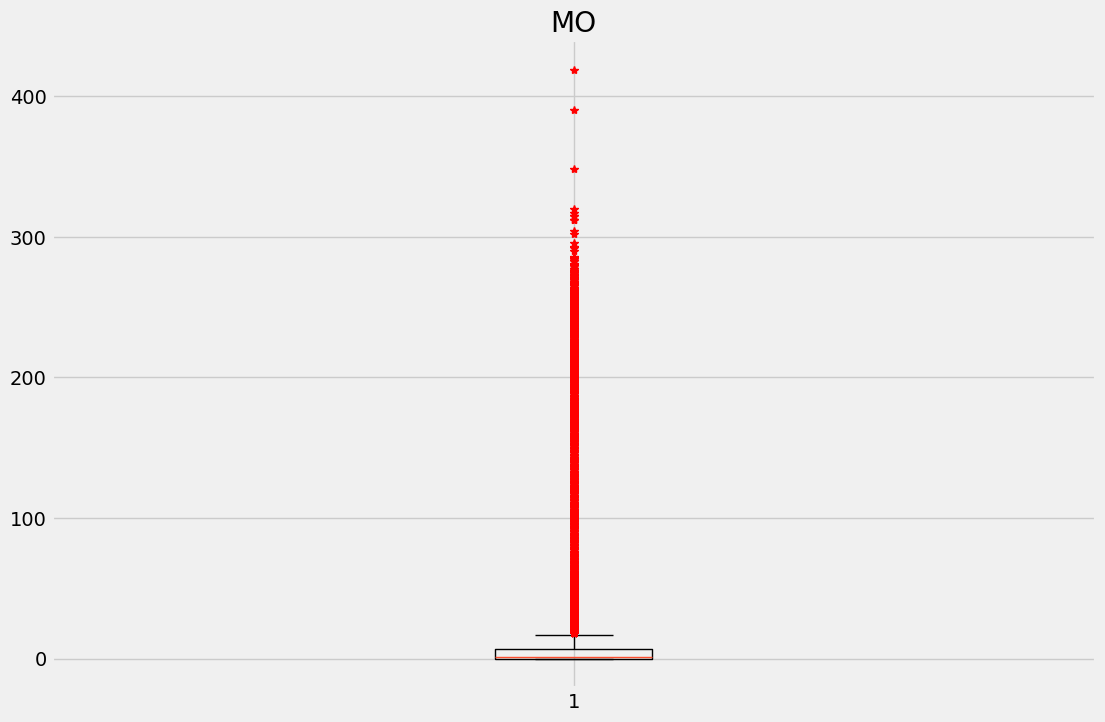

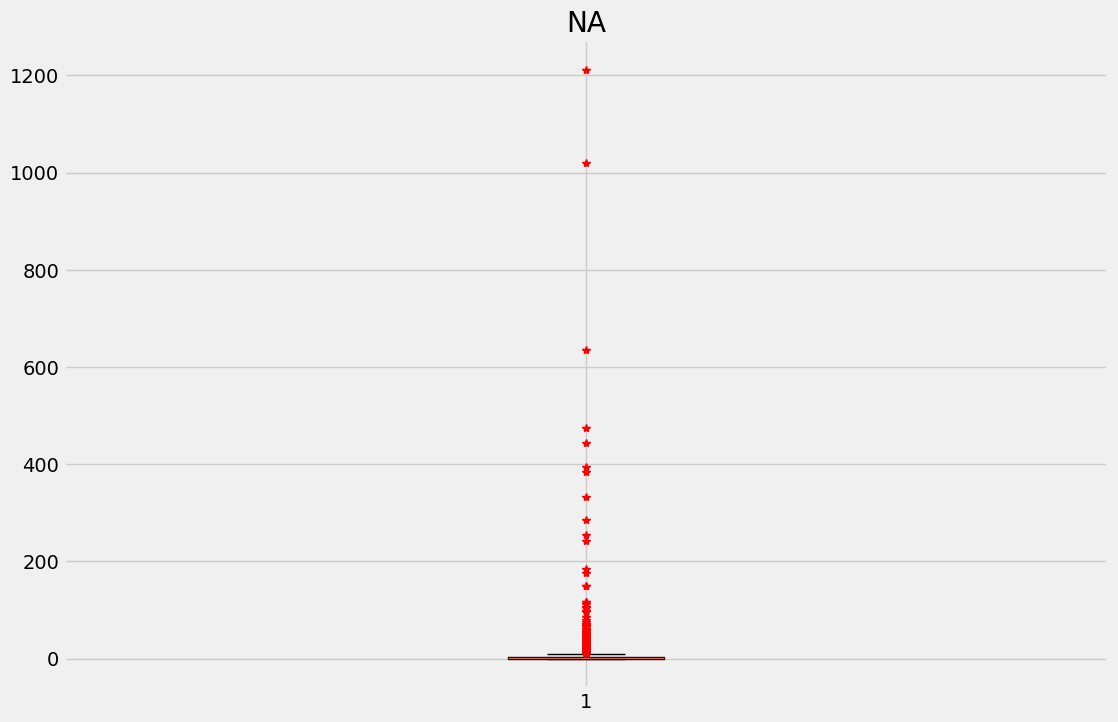

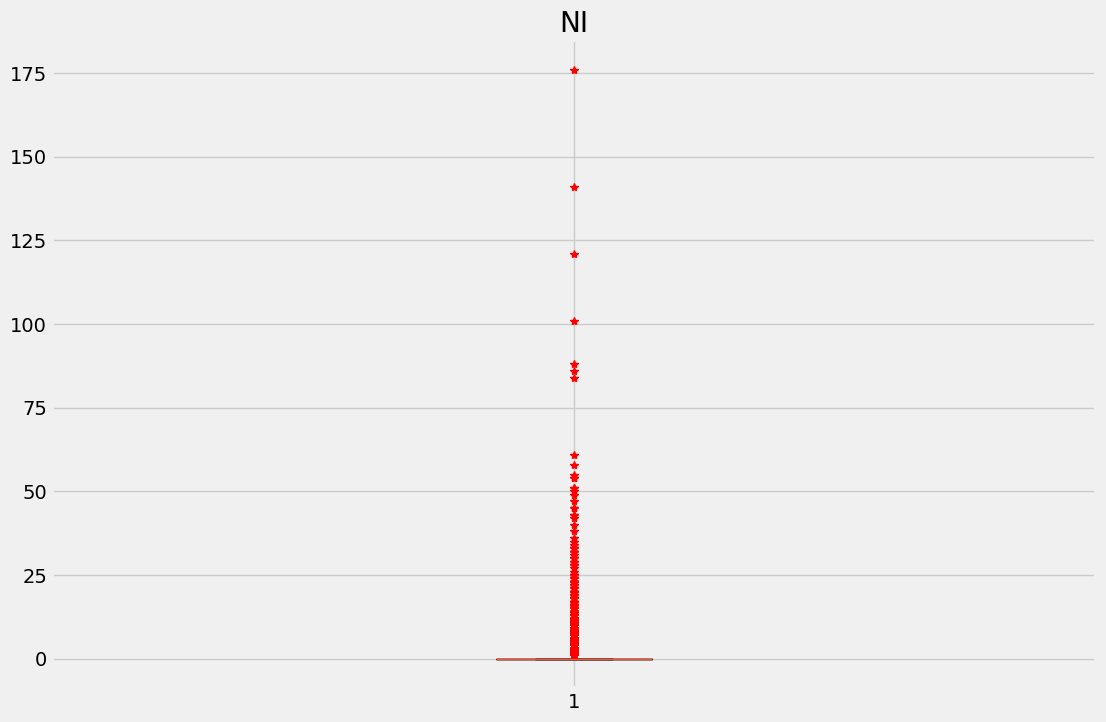

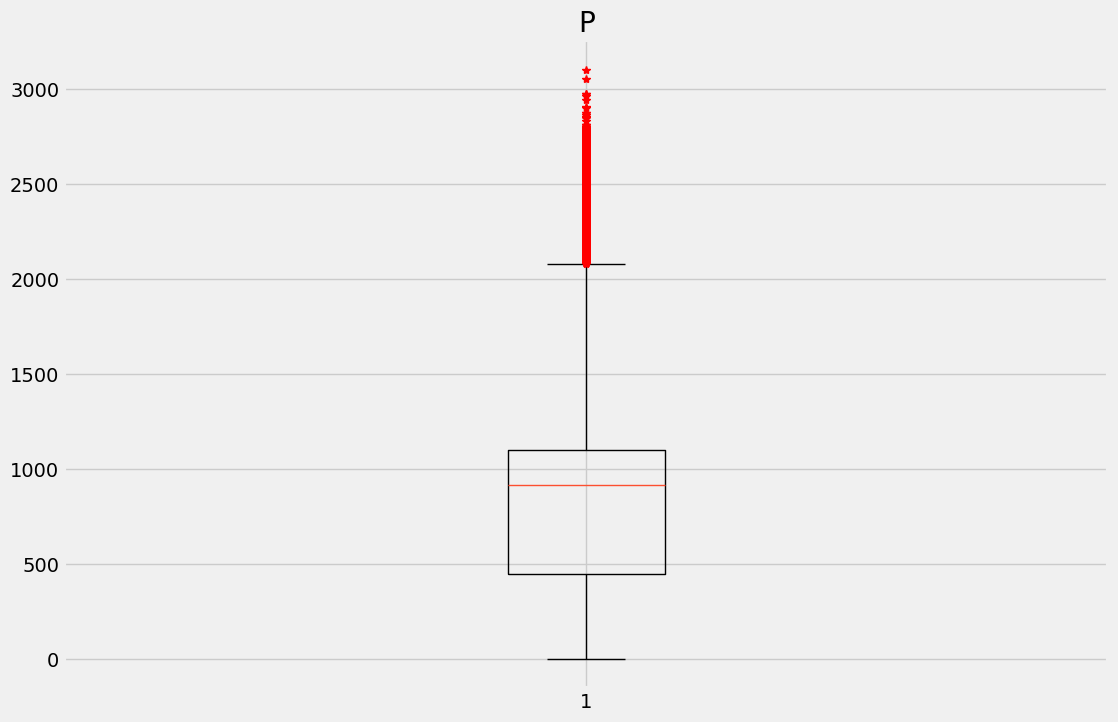

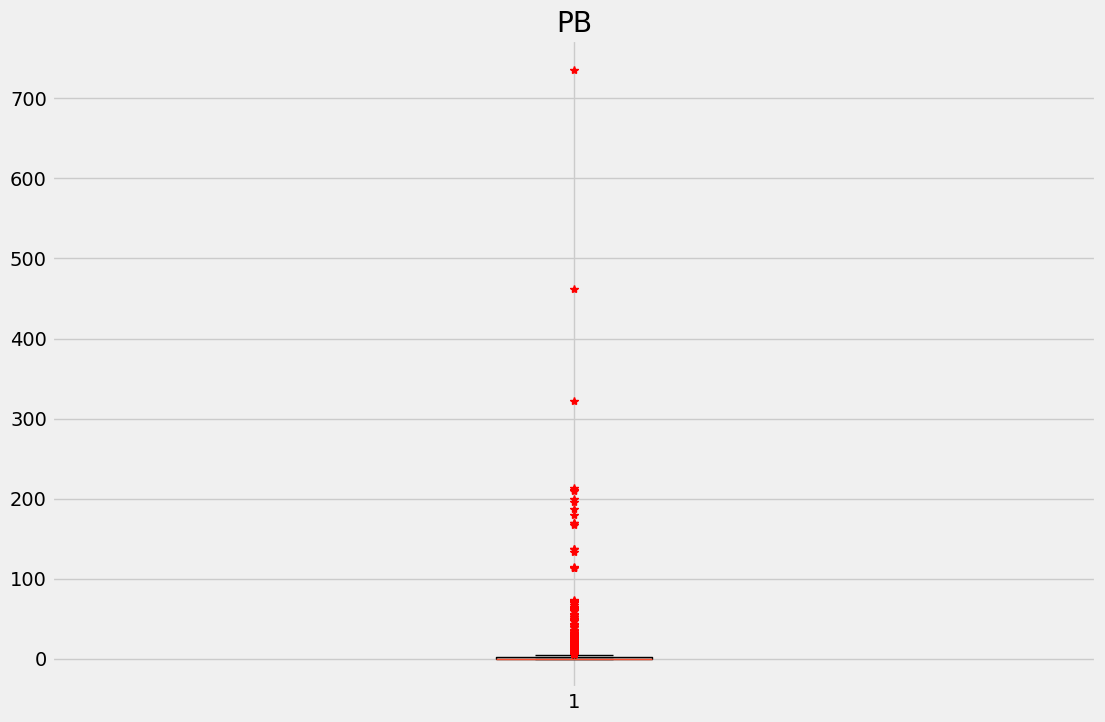

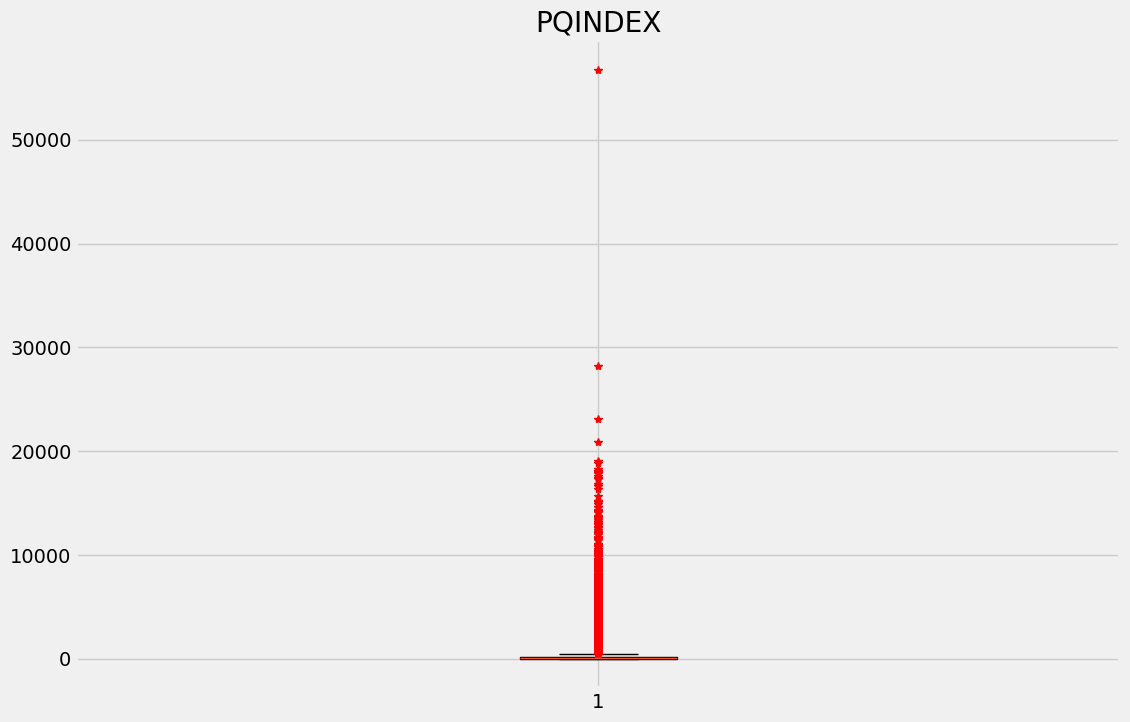

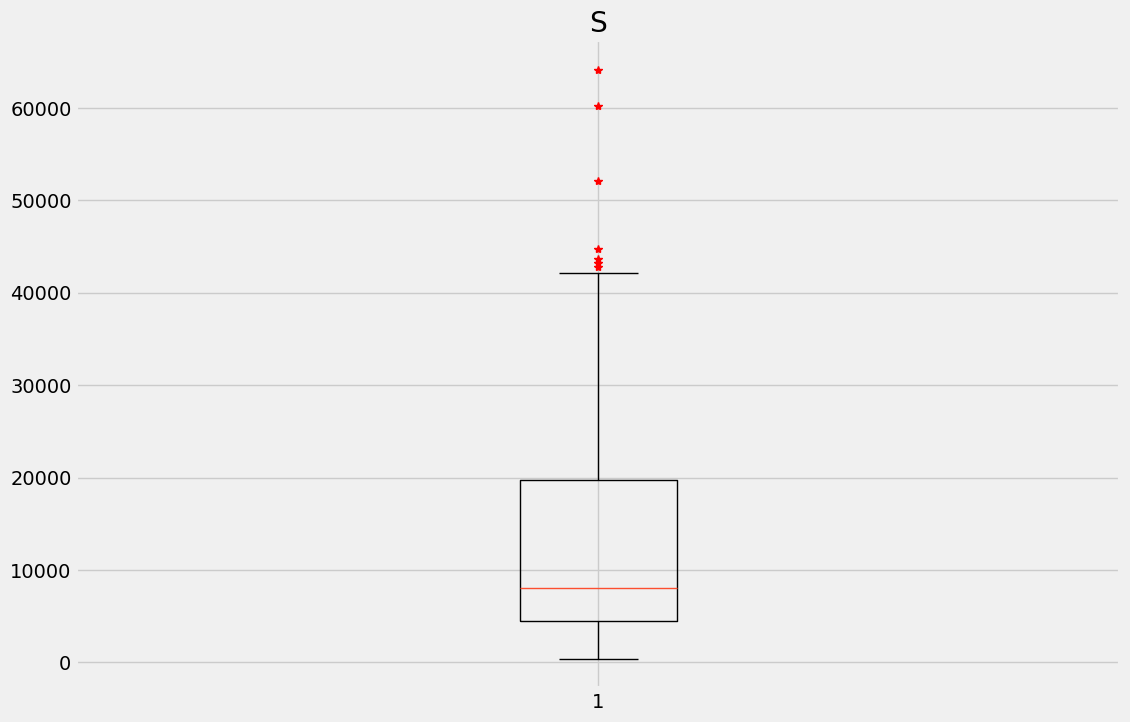

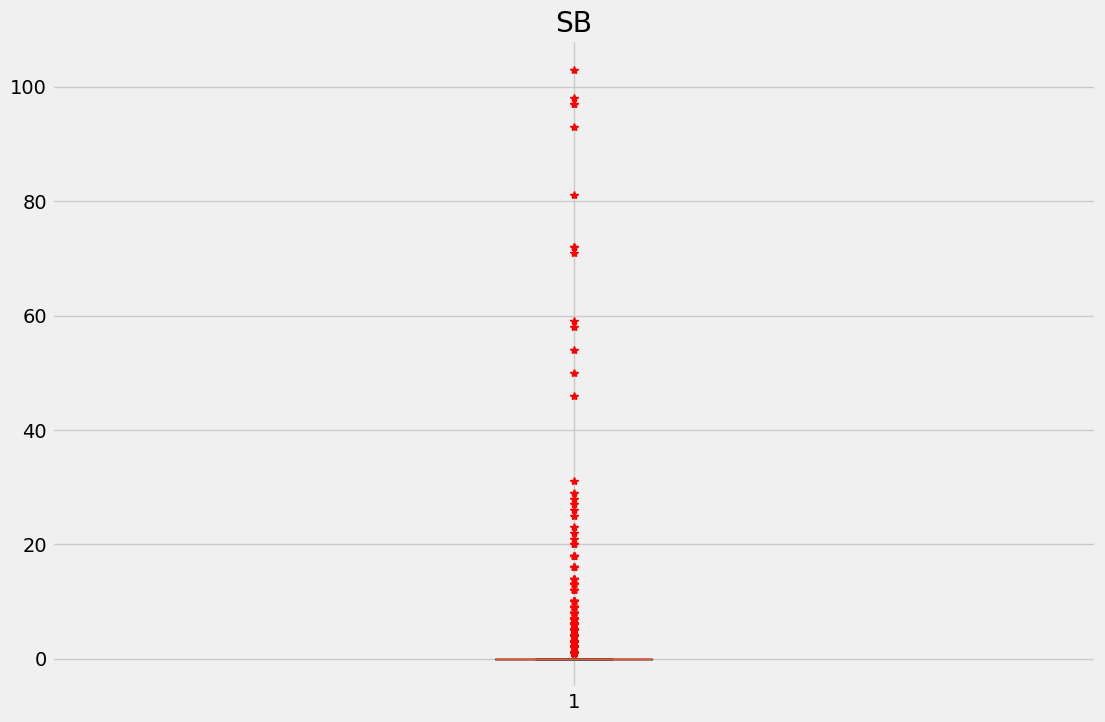

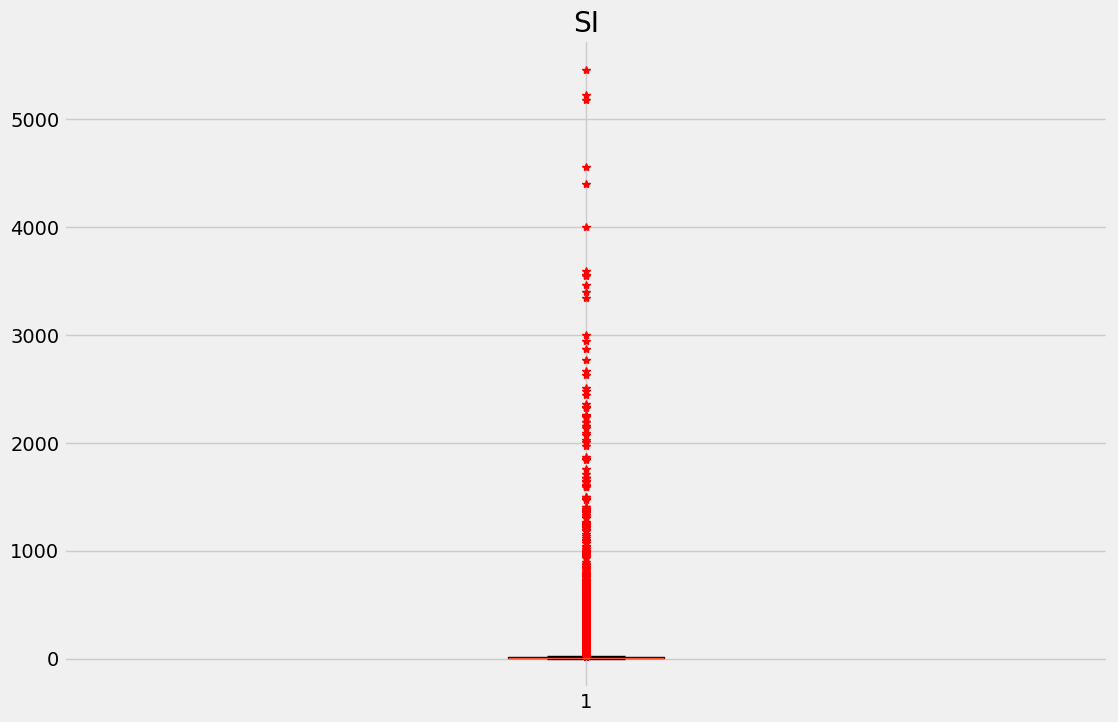

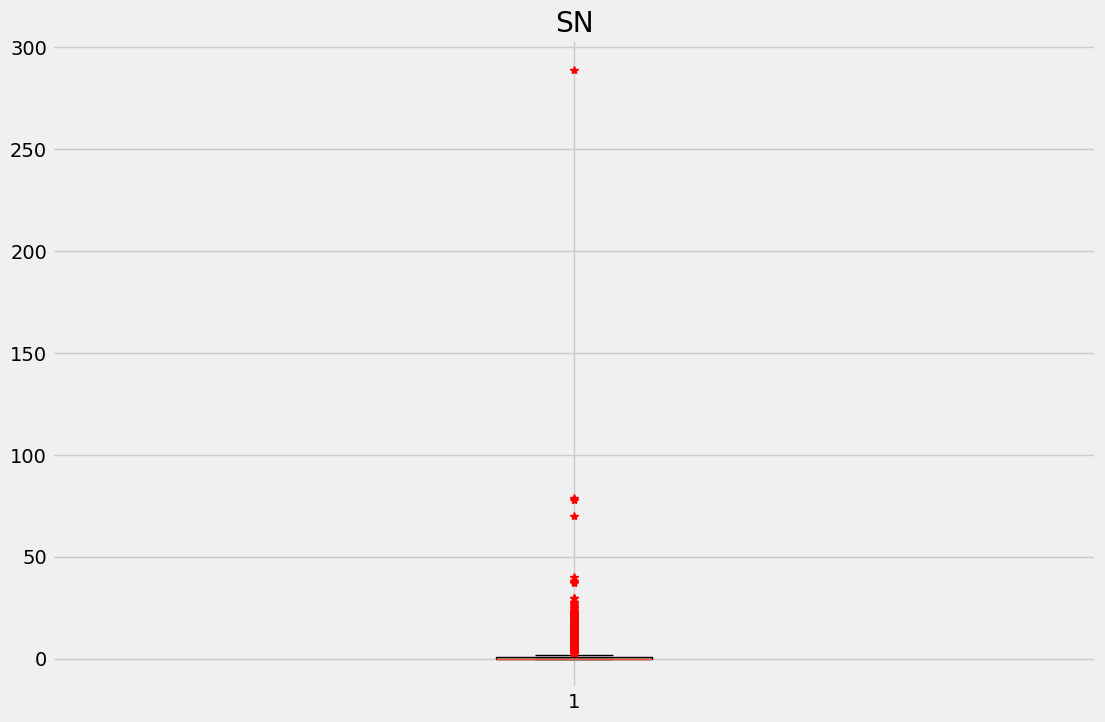

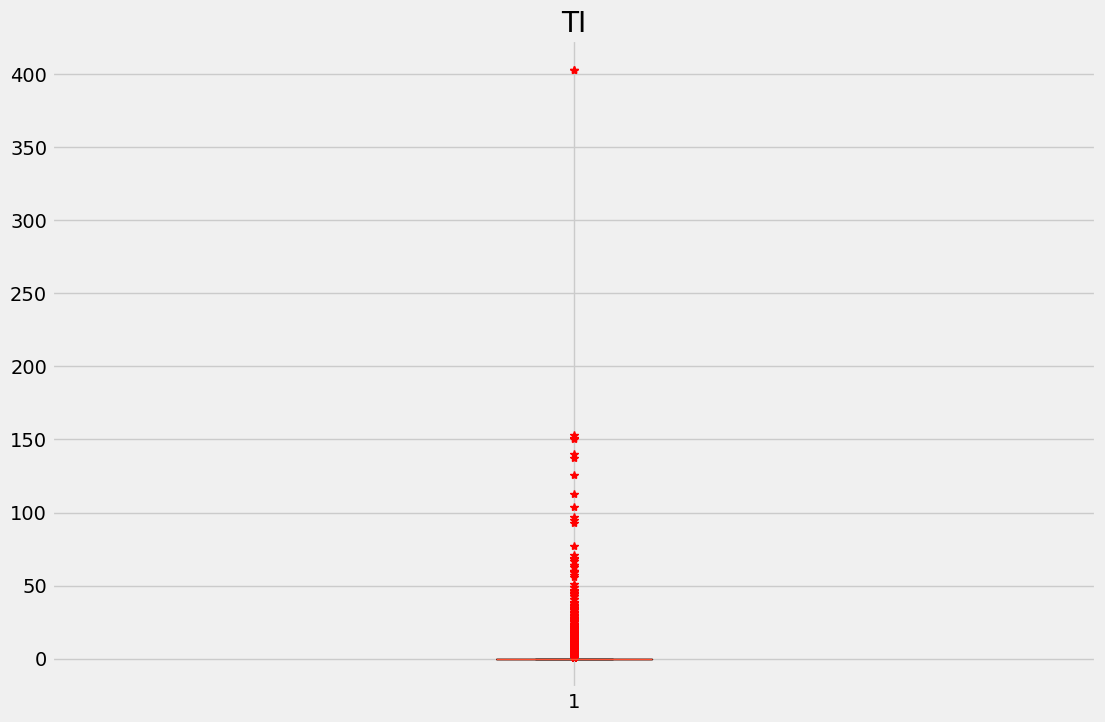

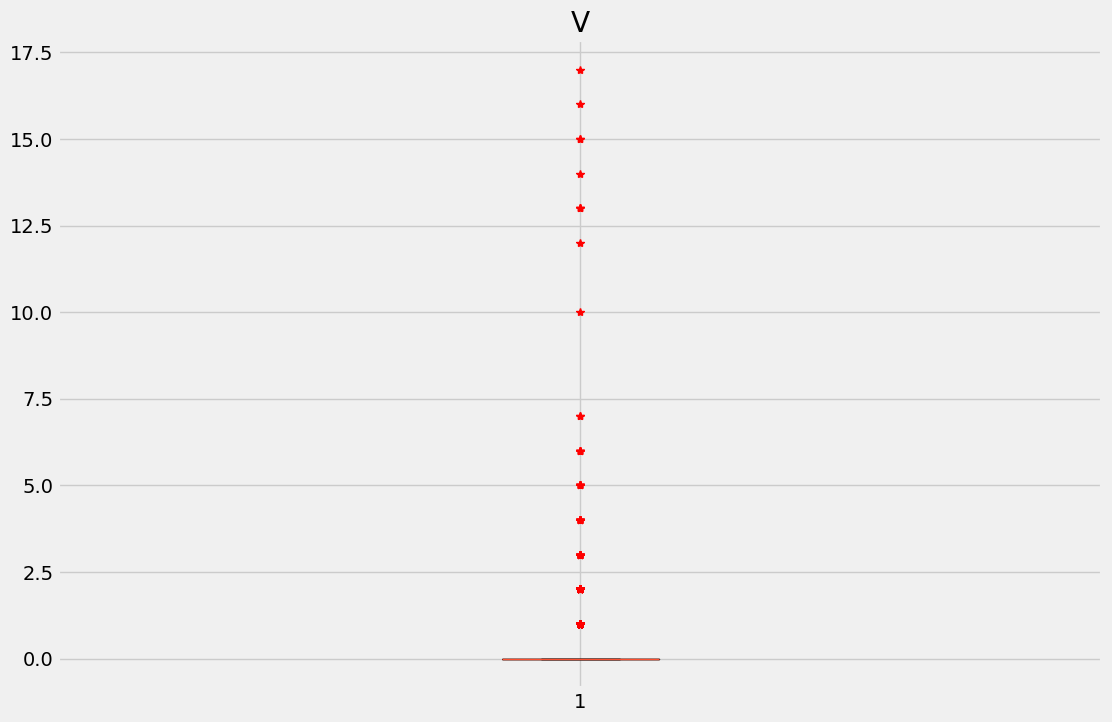

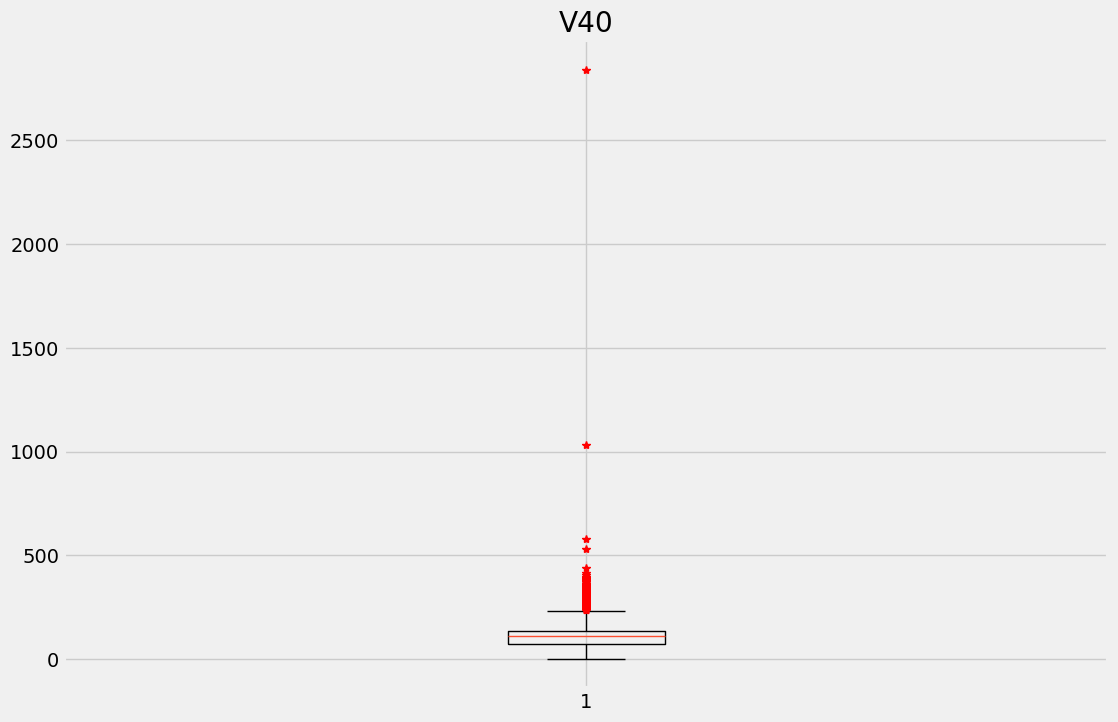

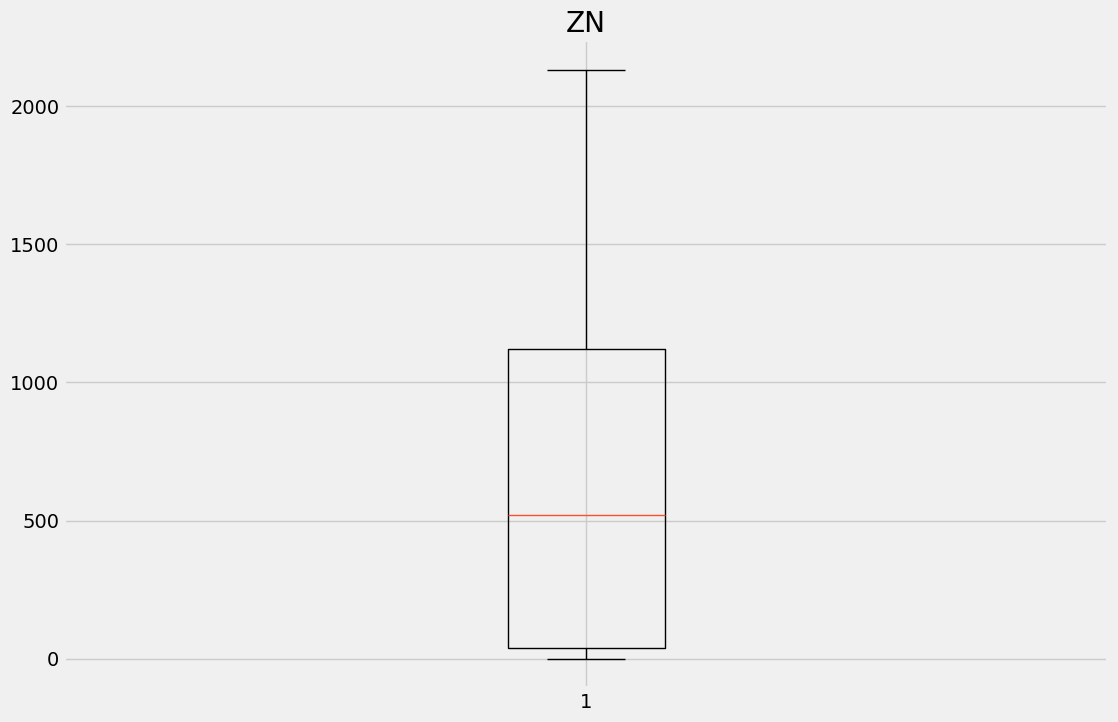

In [26]:
for col in numerical_features :
    plt.figure(figsize=(12, 8))
    plt.boxplot(df[col], sym='r*')
    plt.title(col)
    plt.show()

*    위의 boxplot을 참고하면 대부분의 데이터에서 Outlier 값이 매우 많은 것을 확인할 수 있다.
*    따라서 outlier 값을 제거하게 되면 데이터의 대부분이 소실되어 정확한 데이터 정보 파악이 불가능해 outlier 값을 포함해 데이터 시각화를 진행했다.

# 데이터 시각화

## Y_label 0과 1비율 확인

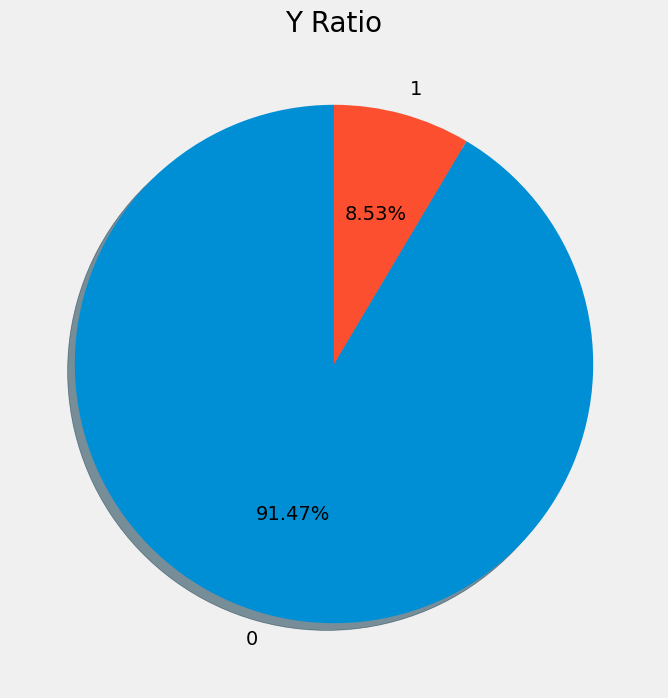

In [27]:
plt.subplots(figsize = (8,8))
plt.pie(df['Y_LABEL'].value_counts(), labels = df['Y_LABEL'].value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('Y Ratio', size=20)
plt.show()

*   데이터의 개수가 다르기 때문에 이를 반영한 그래프 해석이 필요하다.

# ✅ **결론**

1. 정상치와 이상치의 비율이 지나치게 Imbalance하다.
2. 'AL'과 같이 test에는 존재하지 않는 feature들의 영향이 크므로 Teacher모델 훈련시에 이러한 feature들을 얼마나 잘 활용하느냐가 관건인 것 같다.
3. 주어진 데이터 자체가 많이 치우쳐 있으므로 Tree기반의 Ensemble 모델 혹은 딥러닝 모델의 성능이 좋을 것으로 판단되고 이러한 모델들을 활용할 때에 전처리 유무는 categorical 변수 외에는 크게 성능의 차이가 없는 것으로 보인다.
4. train에 과적합된 모델을 얼마나 test셋에 대하여 일반화를 잘 수행하는지가 Score 상승의 열쇠이다.

# train과 test dataset나누기

### ADASYN 사용 hyperparameter 조절

In [53]:
from imblearn.over_sampling import ADASYN

# 특성과 레이블 분리
X = df.drop('Y_LABEL', axis=1)
y = df['Y_LABEL'].astype('int')

# X는 입력 특성, y는 라벨로 이루어진 데이터셋
adasyn = ADASYN(sampling_strategy=0.3, n_neighbors=3, random_state =888)
X_resampled, y_resampled = adasyn.fit_resample(X, y)



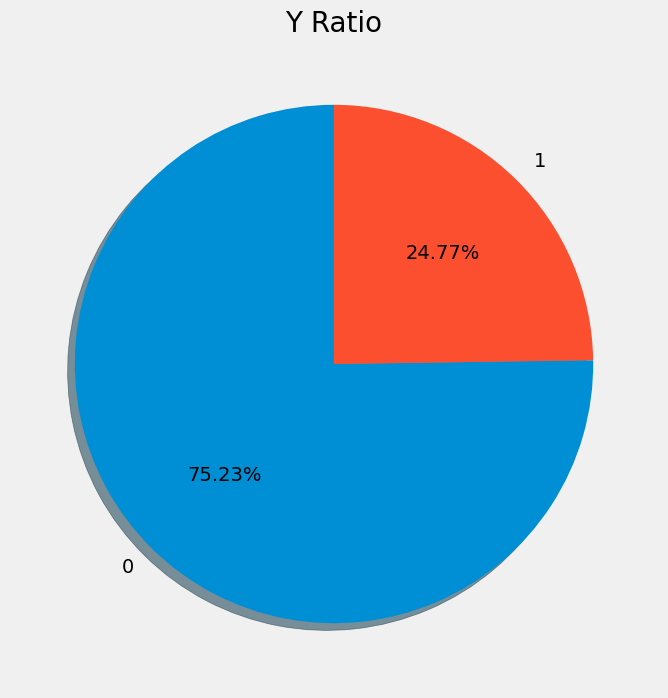

In [54]:
plt.subplots(figsize = (8,8))
plt.pie(y_resampled.value_counts(), labels = y_resampled.value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('Y Ratio', size=20)
plt.show()

In [55]:
# X, y = X_resampled, y_resampled
# 데이터를 트레인 데이터와 테스트 데이터로 나눔
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 결과 확인
print('X_train:\n',X_train_ada)
print('y_train:\n',y_train_ada)
print('X_test:\n',X_test)
print('y_test:\n',y_test)


X_train:
        COMPONENT1  COMPONENT2  COMPONENT3  COMPONENT4  ANONYMOUS_1  YEAR  \
7792            0           0           1           0         1698  2010   
7886            1           0           0           0         1635  2008   
4606            0           0           1           0         5116  2007   
12478           0           0           1           0         2440  2017   
14800           0           0           1           0         6937  2013   
...           ...         ...         ...         ...          ...   ...   
11284           0           0           1           0         3575  2009   
11964           0           0           1           0         4214  2018   
5390            0           1           0           0         2202  2007   
860             0           0           1           0        22087  2013   
15795           0           1           0           0         6081  2014   

       SAMPLE_TRANSFER_DAY  ANONYMOUS_2  AG   AL  ...  PB  PQINDEX      S  SB

- 언더 샘플링

In [31]:

#원본데이터 나누기 : 아다신사용하지 않음, 언더샘플링으로 비율조절
# from imblearn.under_sampling import RandomUnderSampler

# # X: 피처 데이터, y: 레이블 데이터
# # majority_class_label: 다수 클래스 레이블
# under_sampler = RandomUnderSampler(sampling_strategy={0 : 2})

# # 언더 샘플링 수행
# X_resampled_under, y_resampled_under = under_sampler.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X_resampled_under, y_resampled_under, test_size=0.8, random_state=42)
# print('X_test:\n',X_test)
# print('y_test:\n',y_test)

## 표준화

In [56]:
scaler = StandardScaler()

# 아다신 사용트레인 데이터에 대해 표준화를 적용하고, 테스트 데이터에 대해 표준화를 적용
X_train_ada_std = scaler.fit_transform(X_train_ada)
X_test_ada_std = scaler.transform(X_test_ada)

#원본데이터 표준화
#트레인 데이터에 대해 표준화를 적용하고, 테스트 데이터에 대해 표준화를 적용
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 결과 확인
print(X_train_ada_std)
print(X_test_std)
print(y_train_ada)
print(y_test)

[[-0.59535616 -0.43518982  1.0086241  ... -0.10260738  1.55227707
  -1.04882752]
 [ 1.67966683 -0.43518982 -0.99144964 ... -0.10260738  0.51056922
   1.2622082 ]
 [-0.59535616 -0.43518982  1.0086241  ... -0.10260738  1.37942732
  -0.97147857]
 ...
 [-0.59535616  2.29784784 -0.99144964 ... -0.10260738 -1.51753456
   0.16234386]
 [-0.59535616 -0.43518982  1.0086241  ... -0.10260738  0.66728633
  -0.99223073]
 [-0.59535616  2.29784784 -0.99144964 ... -0.10260738 -1.19805547
  -0.23006058]]
[[-0.61852022  2.26702231 -0.99817721 ... -0.10329554 -1.01610722
  -0.31186906]
 [-0.61852022 -0.44110726  1.00182611 ... -0.10329554  0.60227227
  -1.08495058]
 [-0.61852022  2.26702231 -0.99817721 ... -0.10329554 -1.2456646
   0.10281788]
 ...
 [-0.61852022 -0.44110726  1.00182611 ... -0.10329554  0.72470287
  -1.01739977]
 [-0.61852022 -0.44110726  1.00182611 ... -0.10329554  0.73044181
  -0.98925359]
 [ 1.61676202 -0.44110726 -0.99817721 ... -0.10329554 -0.11126857
   0.88152863]]
7792     1
7886  

# 모델 적합

## KNN

- 아다신으로 트레이닝 후 테스트는 실제


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# KNN 분류기 생성
knn = KNeighborsClassifier()

# 탐색할 매개변수 그리드 설정
param_grid = {
    'n_neighbors': [3, 5, 7],  # 이웃의 수
    'weights': ['uniform', 'distance'],  # 가중치 함수
    'metric': ['euclidean', 'manhattan']  # 거리 측정 방법
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5)

# 모델 학습 및 검증
grid_search.fit(X_train_ada_std, y_train_ada)

# 최적의 매개변수 조합 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 예측
# y_test_pred = grid_search.predict(X_test_std)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [34]:
y_train_pred = grid_search.predict(X_train_ada_std)
y_test_pred = grid_search.predict(X_test_std)
print('Misclassfied training samples: %d' %(y_train_ada!=y_train_pred).sum())
print('Misclassfied test samples: %d' %(y_test !=y_test_pred).sum())

Misclassfied training samples: 0
Misclassfied test samples: 165


In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train_ada, y_train_pred))

0.9609836840860724
1.0


In [36]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_true = y_test, y_pred =y_test_pred)
print(conf)

[[3749  119]
 [  46  315]]


In [37]:
from sklearn import metrics
print(metrics.classification_report(y_train_ada,y_train_pred ))
print(metrics.classification_report(y_test,y_test_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8995
           1       1.00      1.00      1.00      3000

    accuracy                           1.00     11995
   macro avg       1.00      1.00      1.00     11995
weighted avg       1.00      1.00      1.00     11995

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3868
           1       0.73      0.87      0.79       361

    accuracy                           0.96      4229
   macro avg       0.86      0.92      0.89      4229
weighted avg       0.97      0.96      0.96      4229



## Logistic regression classifier


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 로지스틱 회귀 분류기 생성
logistic_reg = LogisticRegression()

# 탐색할 매개변수 그리드 설정
param_grid = {
    'C': [0.1, 1.0, 10.0],  # 규제 매개변수
    'penalty': ['l1', 'l2'],  # 규제 유형
    'solver': ['liblinear']  # 최적화 알고리즘
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5)

# 모델 학습 및 검증
grid_search.fit(X_train_ada_std, y_train_ada)

# 최적의 매개변수 조합 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 예측
# y_pred = grid_search.predict(X_test_std)


Best Parameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [39]:
y_test_pred = grid_search.predict(X_test_std)
y_train_pred = grid_search.predict(X_train_ada_std)

In [40]:
from sklearn.metrics import accuracy_score
print('Test Accuracy:',accuracy_score(y_test, y_test_pred))
print('Train Accuracy:',accuracy_score(y_train_ada, y_train_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.7384724521163396
Train Accuracy: 0.907711546477699
[[2835 1033]
 [  73  288]]


In [41]:
from sklearn import metrics
print(metrics.classification_report(y_train_ada,y_train_pred ))
print(metrics.classification_report(y_test,y_test_pred ))


              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8995
           1       0.95      0.67      0.78      3000

    accuracy                           0.91     11995
   macro avg       0.92      0.83      0.86     11995
weighted avg       0.91      0.91      0.90     11995

              precision    recall  f1-score   support

           0       0.97      0.73      0.84      3868
           1       0.22      0.80      0.34       361

    accuracy                           0.74      4229
   macro avg       0.60      0.77      0.59      4229
weighted avg       0.91      0.74      0.79      4229



## LDA


In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# LDA 분류기 생성
lda = LinearDiscriminantAnalysis()

# 탐색할 매개변수 그리드 설정
param_grid = {
    'n_components': [1],  # LDA 변환 차원
    'solver': ['svd', 'lsqr', 'eigen']  # 최적화 알고리즘
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(lda, param_grid, cv=5)

# 모델 학습 및 검증
grid_search.fit(X_train_ada_std, y_train_ada)

# 최적의 매개변수 조합 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 예측
y_test_pred = grid_search.predict(X_test_std)
y_train_pred = grid_search.predict(X_train_ada_std)


Best Parameters: {'n_components': 1, 'solver': 'svd'}


In [43]:
from sklearn.metrics import accuracy_score
print('Test Accuracy:',accuracy_score(y_test, y_test_pred))
print('Train Accuracy:',accuracy_score(y_train_ada, y_train_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.9408843698273823
Train Accuracy: 0.8252605252188412
[[3864    4]
 [ 246  115]]


In [44]:
from sklearn import metrics
print(metrics.classification_report(y_train_ada,y_train_pred ))
print(metrics.classification_report(y_test,y_test_pred ))


              precision    recall  f1-score   support

           0       0.81      1.00      0.90      8995
           1       0.99      0.30      0.47      3000

    accuracy                           0.83     11995
   macro avg       0.90      0.65      0.68     11995
weighted avg       0.86      0.83      0.79     11995

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3868
           1       0.97      0.32      0.48       361

    accuracy                           0.94      4229
   macro avg       0.95      0.66      0.72      4229
weighted avg       0.94      0.94      0.93      4229



## QDA


In [57]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# QDA 분류기 생성
qda = QuadraticDiscriminantAnalysis()

# 탐색할 매개변수 그리드 설정
param_grid = {
    'reg_param': [0.0,0.05, 0.1, 0.2,0.3],  # 정규화 매개변수
    'priors': [None, [0.4, 0.6],[0.5, 0.5], [0.3, 0.7]]  # 사전 확률
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(qda, param_grid, cv=5)

# 모델 학습 및 검증
grid_search.fit(X_train_ada_std, y_train_ada)

# 최적의 매개변수 조합 출력
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'priors': [0.4, 0.6], 'reg_param': 0.0}


In [58]:
# 최적의 모델로 예측
y_train_ada_pred =grid_search.predict(X_train_ada_std)
y_test_pred =grid_search.predict(X_test_std)

In [59]:
from sklearn.metrics import accuracy_score
print('Test Accuracy:',accuracy_score(y_test, y_test_pred))
print('Train Accuracy:',accuracy_score(y_train_ada, y_train_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.08536296996925988
Train Accuracy: 0.8252605252188412
[[   0 3868]
 [   0  361]]


In [60]:
from sklearn import metrics
print(metrics.classification_report(y_train_ada,y_train_pred ))
print(metrics.classification_report(y_test,y_test_pred ))


              precision    recall  f1-score   support

           0       0.81      1.00      0.90      8995
           1       0.99      0.30      0.47      3000

    accuracy                           0.83     11995
   macro avg       0.90      0.65      0.68     11995
weighted avg       0.86      0.83      0.79     11995

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3868
           1       0.09      1.00      0.16       361

    accuracy                           0.09      4229
   macro avg       0.04      0.50      0.08      4229
weighted avg       0.01      0.09      0.01      4229



In [ ]:
# from sklearn.naive_bayes import GaussianNB
# gnb =GaussianNB()
# gnb.fit(X_train_std, y_train)
# y_train_pred =gnb.predict(X_train_std)
# y_test_pred =gnb.predict(X_test_std)

In [ ]:
# from sklearn.metrics import accuracy_score
# print('Test Accuracy:',accuracy_score(y_test, y_test_pred))
# print('Train Accuracy:',accuracy_score(y_train, y_train_pred))
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, y_test_pred))

## Classification Tree


In [61]:
from sklearn import tree
dtc =tree.DecisionTreeClassifier(criterion ='gini', max_depth=10,random_state=1 )
result =dtc.fit(X_train_ada_std, y_train_ada)

y_train_pred =dtc.predict(X_train_ada_std)
y_test_pred =dtc.predict(X_test_std)

In [ ]:
# tree.plot_tree(result, class_names=['0','1'], feature_names=X_train_ada.columns)

In [63]:
from sklearn.metrics import accuracy_score
print('Test Accuracy:',accuracy_score(y_test, y_test_pred))
print('Train Accuracy:',accuracy_score(y_train_ada, y_train_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.6323007803263183
Train Accuracy: 0.9484785327219675
[[2380 1488]
 [  67  294]]


In [64]:
from sklearn import metrics
print(metrics.classification_report(y_train_ada,y_train_pred ))
print(metrics.classification_report(y_test,y_test_pred ))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8995
           1       0.97      0.82      0.89      3000

    accuracy                           0.95     11995
   macro avg       0.96      0.91      0.93     11995
weighted avg       0.95      0.95      0.95     11995

              precision    recall  f1-score   support

           0       0.97      0.62      0.75      3868
           1       0.16      0.81      0.27       361

    accuracy                           0.63      4229
   macro avg       0.57      0.71      0.51      4229
weighted avg       0.90      0.63      0.71      4229



In [ ]:
# from sklearn import metrics
# print(metrics.classification_report(y_test,y_test_pred ))

In [ ]:
# from pydotplus import graph_from_dot_data
# from sklearn.tree import export_graphviz
# dot_data =export_graphviz(dtc, filled=True, rounded =True,
#                           class_names =['0','1'],
#                           feature_names=X_train.columns,
#                           out_file=None)

# graph =graph_from_dot_data(dot_data)
# graph.write_png('tree_depth3.png')

# from IPython.display import Image
# Image(graph.create_png())

## SVM

In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# SVM 분류기 생성
svm = SVC()

# 탐색할 매개변수 그리드 설정
param_grid = {
    'C': [0.1, 1, 10],  # 규제 매개변수
    'kernel': ['linear'],  # 커널 함수
    'gamma': ['scale', 'auto']  # 가우시안 커널의 gamma 값
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(svm, param_grid, cv=5)

# 모델 학습 및 검증
grid_search.fit(X_train_ada_std, y_train_ada)

# 최적의 매개변수 조합 출력
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [66]:
# 최적의 모델로 예측
y_train_pred =grid_search.predict(X_train_ada_std)
y_test_pred =grid_search.predict(X_test_std)

In [67]:
from sklearn import metrics
metrics.accuracy_score(y_train_ada, y_train_pred)

0.9044601917465611

In [68]:
metrics.accuracy_score(y_test, y_test_pred)

0.9028139039962166

In [69]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[3603,  265],
       [ 146,  215]])

In [70]:
from sklearn import metrics
print(metrics.classification_report(y_train_ada,y_train_pred ))
print(metrics.classification_report(y_test,y_test_pred ))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      8995
           1       0.97      0.64      0.77      3000

    accuracy                           0.90     11995
   macro avg       0.93      0.82      0.85     11995
weighted avg       0.91      0.90      0.90     11995

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      3868
           1       0.45      0.60      0.51       361

    accuracy                           0.90      4229
   macro avg       0.70      0.76      0.73      4229
weighted avg       0.92      0.90      0.91      4229



## Kernel SVM

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


# 그리드 서치를 위한 매개변수 그리드 설정
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

# 그리드 서치 수행
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_ada_std, y_train_ada)

# 최적의 매개변수와 최고 성능 출력
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score:  0.9093789078782827


In [72]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# SVM 분류기 생성
svm = SVC()
ksvm =SVC(kernel='rbf', C=10, gamma='auto', random_state=42)
ksvm.fit(X_train_ada_std, y_train_ada)

y_train_pred =ksvm.predict(X_train_ada_std)
y_test_pred =ksvm.predict(X_test_std)

In [73]:
from sklearn import metrics
metrics.accuracy_score(y_train_ada, y_train_pred)

0.9232180075031263

In [74]:
metrics.accuracy_score(y_test, y_test_pred)

0.9162922676755734

In [75]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[3616,  252],
       [ 102,  259]])

In [76]:
from sklearn import metrics
print(metrics.classification_report(y_train_ada,y_train_pred ))
print(metrics.classification_report(y_test,y_test_pred ))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      8995
           1       0.98      0.71      0.82      3000

    accuracy                           0.92     11995
   macro avg       0.95      0.85      0.89     11995
weighted avg       0.93      0.92      0.92     11995

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3868
           1       0.51      0.72      0.59       361

    accuracy                           0.92      4229
   macro avg       0.74      0.83      0.77      4229
weighted avg       0.93      0.92      0.92      4229



In [ ]:
print(ksvm.support_)
print(ksvm.n_support_)

## RandomForest : grid search


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 랜덤 포레스트 분류기 생성
rf = RandomForestClassifier()

# 탐색할 매개변수 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],  # 결정 트리 개수
    'max_depth': [None, 5, 10],  # 결정 트리의 최대 깊이
    'min_samples_split': [2, 5, 10]  # 내부 노드를 분할하기 위해 필요한 최소 샘플 개수
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(rf, param_grid, cv=5)

# 모델 학습 및 검증
grid_search.fit(X_train_ada_std, y_train_ada)

# 최적의 매개변수 조합 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 예측
y_pred = grid_search.predict(X_test_std)
print(y_pred)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
[1 0 1 ... 1 1 0]


### 거꾸로 학습


In [87]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 30, min_samples_split = 7, n_estimators = 300)

# 모델 학습
model.fit(X_test_std, y_test)

# 테스트 데이터로 예측 수행
y_train_pred = model.predict(X_train_ada_std)
y_pred =model.predict(X_test_std)


In [88]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))
print(metrics.classification_report(y_train_ada, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3868
           1       1.00      0.68      0.81       361

    accuracy                           0.97      4229
   macro avg       0.99      0.84      0.90      4229
weighted avg       0.97      0.97      0.97      4229

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      8995
           1       1.00      0.42      0.59      3000

    accuracy                           0.85     11995
   macro avg       0.92      0.71      0.75     11995
weighted avg       0.88      0.85      0.83     11995



In [89]:
import shap

# 변수 중요도 추출
importance = model.feature_importances_
importance = sorted(zip(range(len(importance)), importance), key=lambda x: x[1], reverse=True)

# 변수 중요도 출력
for feat, score in importance:
    print(f'Feature {feat}: {score}')

# 중요도가 일정 임계값 이상인 변수 선택
threshold = 0.05
selected_features = [feat for feat, score in importance if score >= threshold]


ModuleNotFoundError: ignored

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# fig.suptitle("XGboost")

xg_disp = PartialDependenceDisplay.from_estimator(model, X_train_std, [9])
xg_disp = PartialDependenceDisplay.from_estimator(model, X_train_std, [20])


# Show the plot
plt.show()

In [ ]:
# shap.summary_plot(shap_values[:, [9,14,1,20,2,5,0,34]], X_test_std[:, [9,14,1,20,2,5,0,34]], feature_names=df.drop('Y_LABEL', axis=1).columns[[9,14,1,20,2,5,0,34]], class_names=['0', '1'])


## Xgboost

In [ ]:
!pip install pdpbox

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# XGBoost 분류기 생성
xgb_model = xgb.XGBClassifier()

# 그리드 서치를 위한 매개변수 그리드 설정
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'gamma': [0, 0.1, 0.2],
}

# 그리드 서치 수행
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)
grid_search.fit(X_train_std, y_train)

# 최적의 매개변수와 최고 성능 출력
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


KeyboardInterrupt: ignored

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dtrain = xgb.DMatrix(X_train_ada_std, label=y_train_ada)
dtest = xgb.DMatrix(X_test_std, label=y_test)
# XGBoost 모델 설정

# XGBoost 모델 설정
param = {
    'max_depth': 7,  # 트리의 최대 깊이
    'learning_rate': 0.1,  # 학습 속도
    'gamma': 0.2,  # 가지치기 임계값
    # 'num_boost_rounds': 200,  # 트리의 개수
    'objective': 'binary:logistic',  # 이진 분류 문제 설정
    'booster': 'gbtree'  # 부스터 타입 설정
}
num_round = 200  # 반복 횟수

# 모델 학습
model = xgb.train(param, dtrain, num_round)

# 테스트 데이터로 예측 수행
y_pred_prob = model.predict(dtest)
y_pred = [1 if value >= 0.5 else 0 for value in y_pred_prob]

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.1229605107590447


In [ ]:
from sklearn import metrics
# print(metrics.classification_report(y_train,y_train_pred ))
print(metrics.classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.98      0.04      0.08      3868
           1       0.09      0.99      0.16       361

    accuracy                           0.12      4229
   macro avg       0.53      0.52      0.12      4229
weighted avg       0.91      0.12      0.09      4229



### 중요도, 부분의존성

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 14.3 MB/s eta 0:00:00


In [ ]:
import shap
# 변수 중요도 추출
importance = model.get_score(importance_type='gain')
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# 변수 중요도 출력
for feat, score in importance:
    print(feat, ':', score)

# 중요도가 일정 임계값 이상인 변수 선택
selected_features = [feat for feat, score in importance if score >= 0.05]



f9 : 84.20765686035156
f14 : 33.53018569946289
f20 : 18.447996139526367
f5 : 11.794363975524902
f2 : 9.330015182495117
f0 : 8.47629165649414
f3 : 7.524279594421387
f7 : 7.485095977783203
f12 : 7.302414894104004
f8 : 6.792788505554199
f34 : 6.767029285430908
f13 : 6.019392013549805
f11 : 5.772859573364258
f15 : 5.677752494812012
f4 : 5.464860916137695
f10 : 5.215132236480713
f1 : 5.129276275634766
f16 : 4.375085353851318
f31 : 3.94374942779541
f28 : 3.866166830062866
f6 : 3.5922133922576904
f18 : 3.4980170726776123
f36 : 3.330430269241333
f24 : 3.316197395324707
f17 : 3.1823525428771973
f30 : 3.0810813903808594
f25 : 3.065359354019165
f26 : 3.062426805496216
f19 : 3.007786273956299
f23 : 2.8912644386291504
f22 : 2.8030035495758057
f32 : 2.7992331981658936
f29 : 2.770164728164673
f33 : 2.7274653911590576
f37 : 2.7267656326293945
f27 : 2.585066318511963
f21 : 2.4241297245025635
f35 : 1.642708659172058


In [ ]:
# selected_features

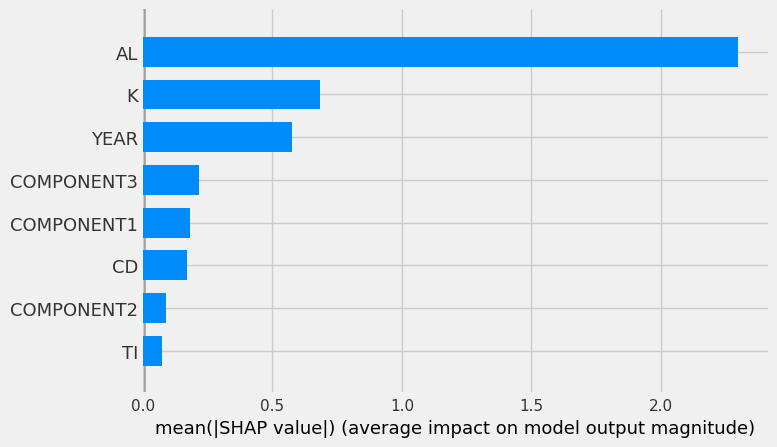

In [ ]:
# 부분 의존성 분석을 위한 요약 플롯 출력
shap.summary_plot(shap_values[:, [9,14,1,20,2,5,0,34]], X_test_std[:, [9,14,1,20,2,5,0,34]], feature_names=df.drop('Y_LABEL', axis=1).columns[[9,14,1,20,2,5,0,34]], class_names=['0', '1'], plot_type='bar')


TypeError: ignored

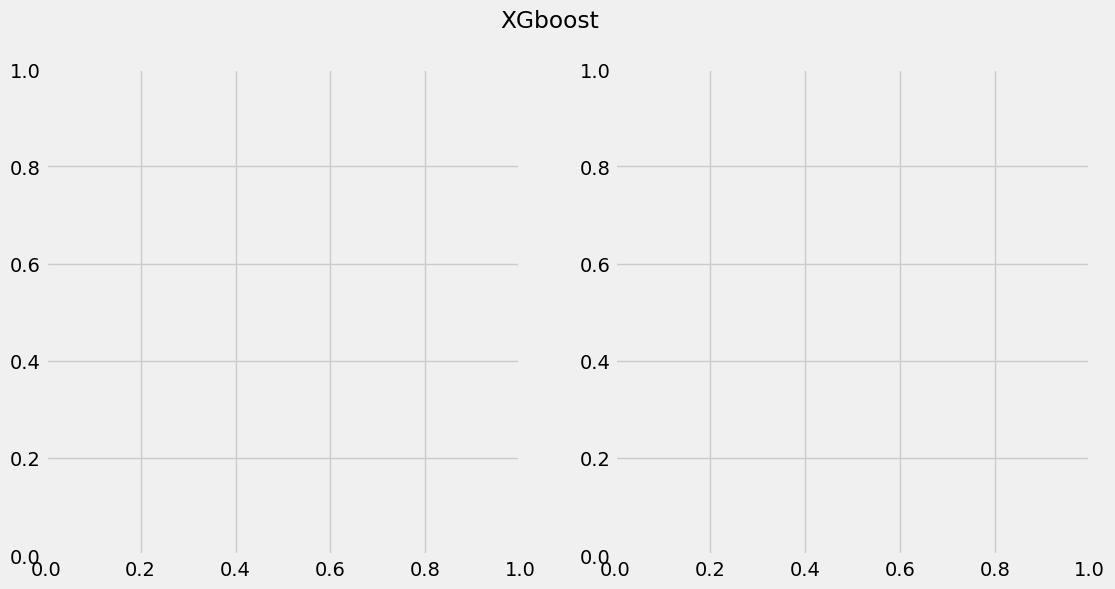

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay


fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("XGboost")

xg_disp = PartialDependenceDisplay.from_estimator(model, X_train_std, [9,14], ax=axs)
# Show the plot
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_friedman1
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.inspection import PartialDependenceDisplay


# fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# fig.suptitle("XGboost")

# xg_disp = PartialDependenceDisplay.from_estimator(a, X_train_std, [9,20], ax=axs)
# # Show the plot
# plt.show()

In [ ]:
# y_train_pred =best_xgb_model.predict(X_train_std)
# y_test_pred =best_xgb_model.predict(X_test_std)

##  Lightgbm

## Catboost 